In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
#import imp
#imp.reload(mpl); imp.reload(plt);
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astroML.time_series import generate_damped_RW

import pdb
import os as os
import random
import kali.csvLC
#import kali.s82
import kali.carma
%matplotlib inline

/Users/Jackster/anaconda/lib/python2.7/site-packages/astroML/time_series/periodogram.py:8: UserWarning: Using slow version of lomb_scargle. Install astroML_addons to use an optimized version
  warnings.warn("Using slow version of lomb_scargle. Install astroML_addons "


# Please install Kali https://github.com/AstroVPK/kali

In [179]:
import imp
imp.reload(mpl); imp.reload(plt);

In [2]:
import richardsplot as rplot


# Simulating a DHO process with Kali library 

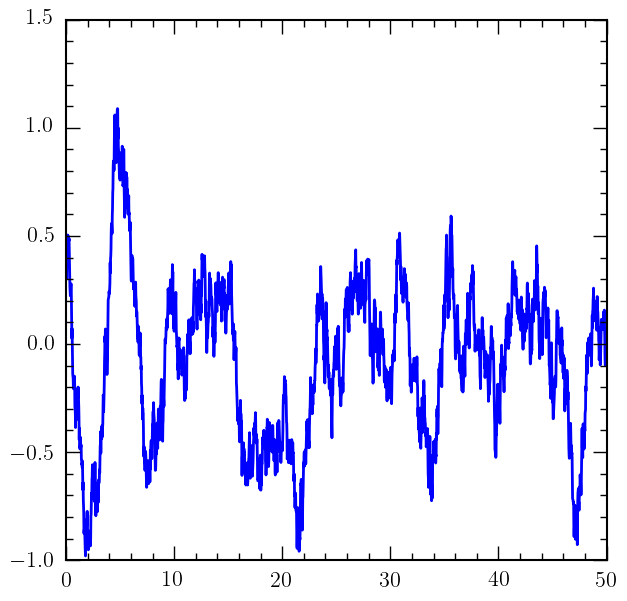

In [3]:
damp = 0.3
omega = 1.
mhdVector = np.array([ 2*omega*0.5,  omega**2,  0.243968 , 0.36025]).copy(order='C')
mhdnt = kali.carma.CARMATask(2, 1)
mhdnt.set(0.02,mhdVector)
mhdlc = mhdnt.simulate(duration=50.0)
plt.plot(mhdlc.t, mhdlc.x)

# What is a Quasi-Periodic Oscillation? 
Perturbations disrupt the phase and amplitude of the harmonic function, they are not simply added or superposed. 

(-0.6, 0.8)

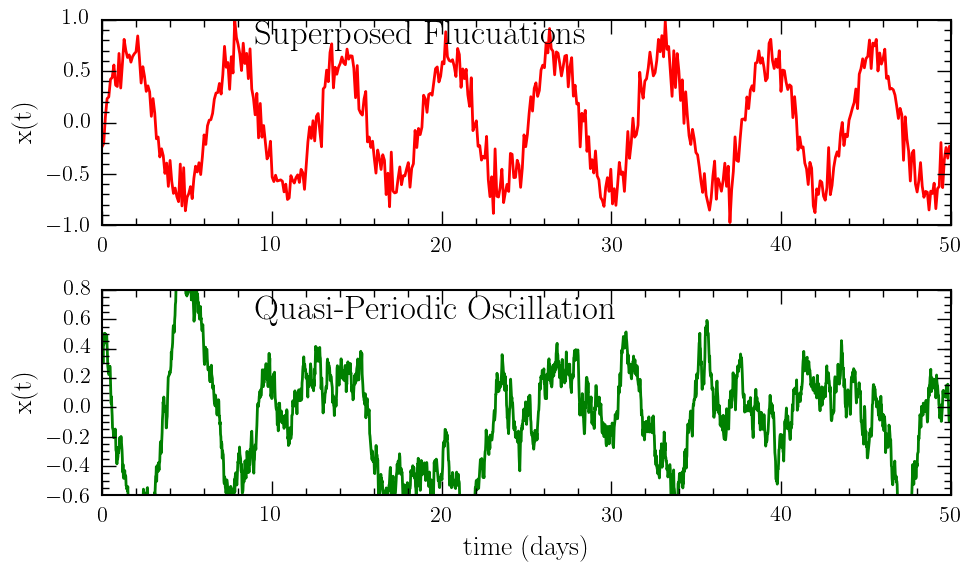

In [6]:
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
n_samples = 500
t = np.linspace(0,50.,n_samples)
omega = 1.
offset = np.random.normal(size=n_samples, scale=0.2)
sup_fluc = np.sin(omega*t ) + offset
qpoCurve = np.sin(omega*t + offset*3.)

plt.plot(t,sup_fluc/sup_fluc.max(),c ='red' ,linewidth = 2, alpha = 1.)
plt.ylim(-1,1)
plt.text(9,.75, 'Superposed Flucuations', fontsize=25)    

plt.ylabel(r'x(t)', fontsize = 20)
plt.subplot(2,1,2)
plt.plot(mhdlc.t, mhdlc.x,c ='green' ,linewidth = 2)
plt.text(9,.6, 'Quasi-Periodic Oscillation', fontsize=25)    
plt.ylabel(r'x(t)', fontsize = 20)
plt.xlabel(r'time (days)', fontsize = 20)
plt.tight_layout()
plt.ylim(-0.6,0.8)
#plt.savefig('./superposedFlucuations.pdf', dpi = 300)

# Overdamped vs. Underdamped Motion
A DHO defined as a sum of exponentials is different from a DHO defined as a damped sinusoid.  The difference is that in the latter case we only explore solutions in the complex plane and rule out motion described by real roots aka highly overdamped behavior.

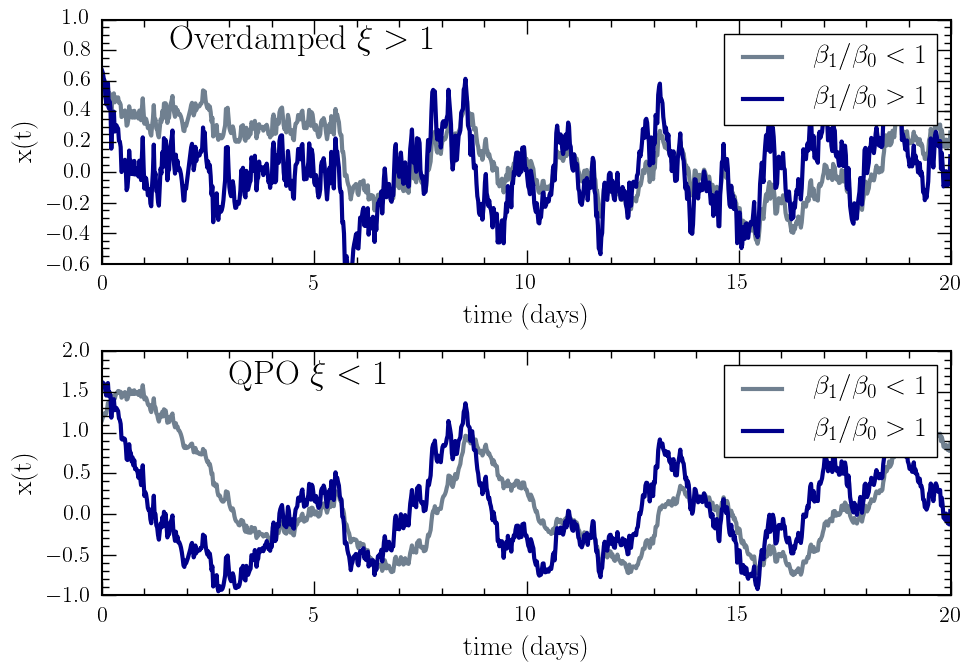

In [8]:
plt.figure(figsize=(10,7))

damp = 0.3
omega = 1.
#white
mhdVector = np.array([ 2*omega*damp,  omega**2,  0.6, 0.3]).copy(order='C')
dampedVector = np.array([ 2*omega*damp*5.,  omega**2,  0.6 , 0.3]).copy(order='C')

mhdnt = kali.carma.CARMATask(2, 1)
mhdnt.set(0.02,mhdVector)
mhdlc = mhdnt.simulate(duration=20.0,burnSeed=1, distSeed=1)
nt = kali.carma.CARMATask(2, 1)
nt.set(0.02,dampedVector)
lc = nt.simulate(duration=20.0,burnSeed=1, distSeed=1)

#blue
mhdVector2 = np.array([ 2*omega*damp,  omega**2,  0.01 , 0.6]).copy(order='C')
dampedVector2= np.array([ 2*omega*damp*5.,  omega**2,  0.01, 0.6]).copy(order='C')
mhdnt2 = kali.carma.CARMATask(2, 1)
mhdnt2.set(0.02,mhdVector2)
mhdlc2 = mhdnt2.simulate(duration=20.0,burnSeed=1, distSeed=1)
nt2 = kali.carma.CARMATask(2, 1)
nt2.set(0.02,dampedVector2)
lc2 = nt2.simulate(duration=20.0,burnSeed=1, distSeed=1)



plt.subplot(2,1,1)
plt.plot(lc.t, lc.x,c ='slategrey',linewidth = 3,  label = r"$\beta_1/\beta_0 < 1$")
plt.plot(lc2.t, lc2.x,c ='darkblue',linewidth = 3, label = r"$\beta_1/\beta_0 > 1$")
plt.text(1.6,.8, r"Overdamped $\xi > 1$", fontsize=25) 

plt.ylim([-0.6,1])
plt.ylabel(r'x(t)', fontsize = 20)
plt.xlabel(r'time (days)', fontsize = 20)
plt.legend(fontsize = 20)

plt.subplot(2,1,2)
plt.plot(mhdlc.t, mhdlc.x,c ='slategrey' ,linewidth = 3, label = r"$\beta_1/\beta_0 < 1$")
plt.plot(mhdlc2.t, mhdlc2.x,c ='darkblue' ,linewidth = 3, label = r"$\beta_1/\beta_0 > 1$")
plt.ylabel(r'x(t)', fontsize = 20)
plt.xlabel(r'time (days)', fontsize = 20)

plt.text(3,1.6, r"QPO $\xi < 1$", fontsize=25) 


plt.legend(fontsize = 20)
plt.tight_layout(h_pad=0.5)
#plt.savefig('./CARMA21.pdf', dpi = 300)

# Auto-Correlation Function of a DHO process vs a DRW

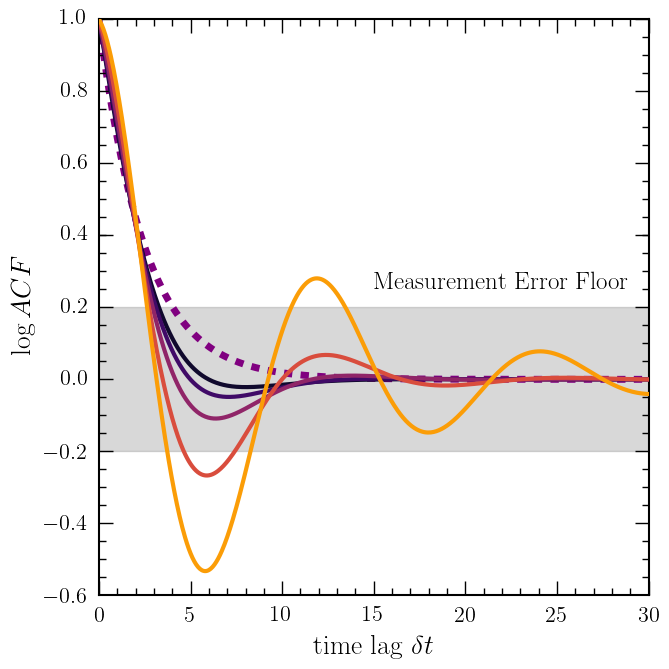

In [4]:
#DRW model with dame decay timescale
damp = 0.4
omega = 1.
drwVector = np.array([ damp, 0.36025]).copy(order='C')
drwnt = kali.carma.CARMATask(1, 0)
drwnt.set(0.02,drwVector)
drwlc = mhdnt.simulate(duration=20.0,burnSeed=1, distSeed=1)


ax = plt.subplot(1,1,1) 

#compute acf of both DRW and DHO WITH THE SAME DECAY TIMESCALE
def overdamp(DF = 1,ff = 1, color = 1, alpha = 1.0,label = None):
    
    cmap = plt.get_cmap('inferno')

    c1 = cmap.colors[0]
    c2 = cmap.colors[1]

    rnp = len(cmap.colors)

    part_colors = np.zeros((rnp, 4))

    part_colors[:,3] = 0.5 # set the alpha = 0.5

    part_colors[:,:3] = cmap.colors # set the particle colors to inferno

    
    dampedVector= np.array([ 2*omega/ff*damp*DF,  (omega/ff)**2,  0.243968, 0.36025]).copy(order='C')
    nt2 = kali.carma.CARMATask(2, 1)
    nt2.set(0.02,dampedVector)
    lagsM_dho_damped, acfM_dho_damped = nt2.acf(num=2000)
    ax.plot(lagsM_dho_damped, acfM_dho_damped, color = part_colors[color,:], linewidth  = 3,alpha = alpha,zorder = 4, label = label)

lagsM, acfM = drwnt.acf(num=2000)
lagsM_dho, acfM_dho = mhdnt.acf(num=2000)
#-----------------ACF FIGURE
overdamp(2.,1.9,color =20,  alpha = 1, label = "DHO")
overdamp(1.8,1.9,color =1*50, alpha = 1,  label = None)
overdamp(1.5,1.9,color =2*50,  alpha = 1,label = None)
overdamp(1.,1.9, color = 3*50, alpha = 1,label = None)
overdamp(.5,1.9,color = 4*50, alpha = 1,label = None)


ax.fill_between([0,30],[0.2,0.2],[-0.2,-0.2],color = 'grey', alpha = 0.3, zorder = 0)

ax.plot(lagsM, acfM, color = "purple",linewidth  = 5,linestyle="--", label = "DRW")
ax.text(15,0.25,"Measurement Error Floor", fontsize = 18)
#ax.plot(lagsM_dho, acfM_dho, color = "green", linewidth  = 3, label = "QPO-DHO")



ax.set_xlim(0,30)
ax.set_ylim(-0.6,1)
ax.set_xlabel(r'time lag $\delta t$', fontsize = 20)
ax.set_ylabel(r'$\log ACF$',fontsize = 20)
#plt.legend(fontsize = 18)
plt.tight_layout()
plt.savefig('./acf_qpo.pdf', dpi = 300)

# Analytic Power Spectral Density (PSD) of a DRW

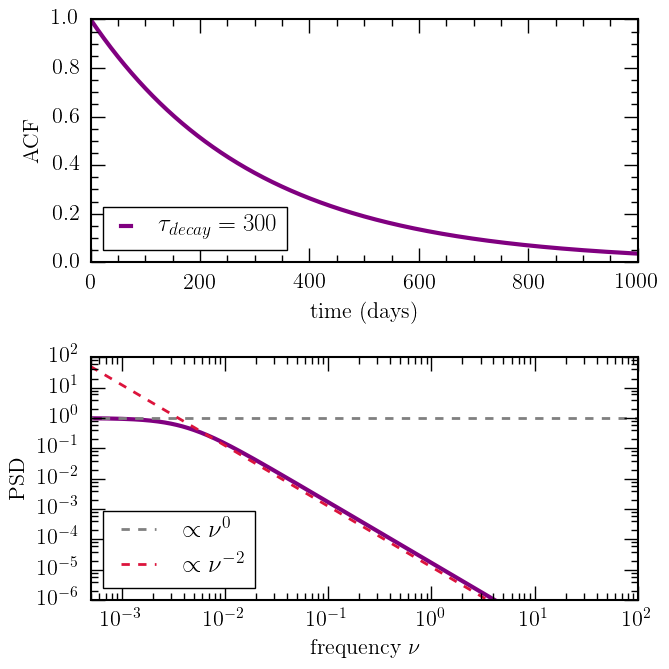

In [1167]:
decay = 300.
a1 = (1./decay)
Rhodrw = np.array([(-1.0/decay), .3])
Thetadrw = kali.carma.coeffs(1, 0, Rhodrw)
ntdrw = kali.carma.CARMATask(1, 0)
ntdrw.set(0.02,Thetadrw)
drwlc = ntdrw.simulate(duration=3000.0,burnSeed=1, distSeed=1)
lagsM, acfM = ntdrw.acf(num=2000, start=0, stop = 1000)



ax = plt.subplot(2,1,1)
ax.plot(lagsM,acfM  , color = "purple" , linewidth = 3,label = r"$\tau_{decay} = 300$" )
plt.legend(loc = "lower left", handlelength = 1,fontsize = 18)
ax.set_xlabel(r"time (days)")
ax.set_ylabel('ACF')
ax2 = plt.subplot(2,1,2)
freq0 = np.linspace(-4, 3,1000)
freq = np.power(10., freq0)
b0 = .3
bluePSD = (b0**2)
Denom = (a1 + 2.*np.pi**4 * freq**2)
PSD = bluePSD/Denom
ax2.plot(freq,PSD/PSD.max() , color = "purple" , linewidth = 3, )
ax2.plot([freq.min(),freq.max()] ,[1.,1.], color = "grey",linestyle = "--",lw = 2, label = r"$\propto \nu^{0}$"  )
ax2.plot(freq,freq**-2./8e4, color = "crimson",linestyle = "--", label = r"$\propto \nu^{-2}$"  )

ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_ylim(1e-6,1e2)
ax2.set_xlim(5e-4,1e2)
plt.legend(loc = "lower left", handlelength = 2,fontsize = 18)
ax2.set_xlabel(r"frequency $\nu$")
ax2.set_ylabel('PSD')
plt.tight_layout()
plt.savefig("./PSDdrw.pdf", dpi = 200)

# The Triplets: ACF, PSD and Structure Function (SF)

/Users/Jackster/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  


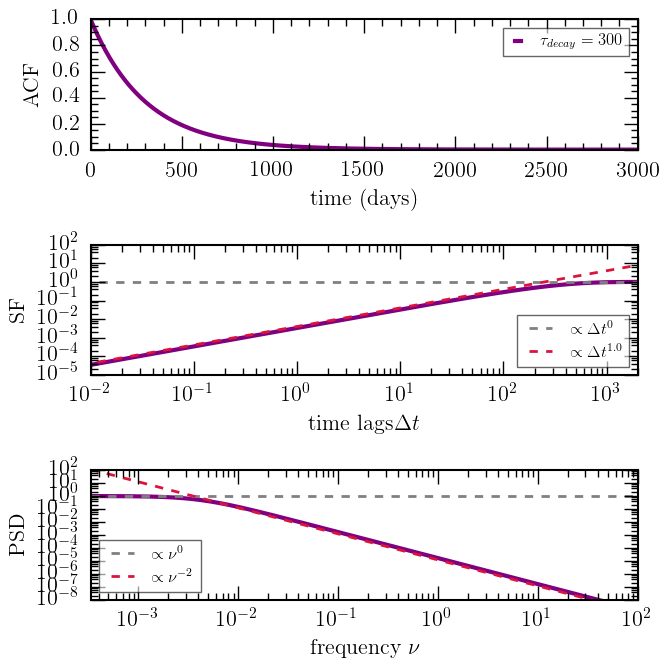

In [1212]:
def tripleThreat(decay = 300., length = 3000.):

    #DRW lc
    Rhodrw = np.array([(-1.0/decay), .3])
    Thetadrw = kali.carma.coeffs(1, 0, Rhodrw)
    drw = kali.carma.CARMATask(1, 0)
    drw.set(0.02,Thetadrw)
    #acf
    drwlc = drw.simulate(duration=length,burnSeed=1, distSeed=1)
    lags, acf = drw.acf(num=2000, start=0, stop = length)
    #sf
    lags, sf = drw.sf(num=2000, start=0, stop = length)
    #PSD
    freq0 = np.linspace(-np.log10(length), np.log10(length),length)
    freq = np.power(10., freq0)
    a1 = (1./decay)
    b0 = .3
    bluePSD = (b0**2)
    Denom = (a1 + 2.*np.pi**4 * freq**2)
    psd = bluePSD/Denom
    return lags, acf, sf, freq, psd

lags, ACF, SF, freq, PSD = tripleThreat(decay = 300., length = 3000.)

ax = plt.subplot(3,1,1)
ax.plot(lags, ACF  , color = "purple" , linewidth = 3,label = r"$\tau_{decay} = 300$" )
plt.legend(loc = "upper right", handlelength = 1,fontsize = 12, framealpha = 0.6)
ax.set_xlabel(r"time (days)")
ax.set_ylabel('ACF')

ax2 = plt.subplot(3,1,2)
ax2.plot(lags,SF/SF.max() , color = "purple" , linewidth = 3, )
ax2.plot([lags.min(),lags.max()] ,[1.,1.], color = "grey",linestyle = "--",lw = 2, label = r"$\propto \Delta t^{0}$"  )
ax2.plot(lags,lags**1./2.5e2, color = "crimson",linestyle = "--", label = r"$\propto \Delta t^{1.0}$"  )
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_ylim(1e-5,1e2)
ax2.set_xlim(1e-2,2e3)
plt.legend(loc = "lower right", handlelength = 2,fontsize = 12,framealpha = 0.6)
ax2.set_xlabel(r"time lags$\Delta t$")
ax2.set_ylabel('SF')

ax3 = plt.subplot(3,1,3)
ax3.plot(freq,PSD/PSD.max() , color = "purple" , linewidth = 3, )
ax3.plot([freq.min(),freq.max()] ,[1.,1.], color = "grey",linestyle = "--",lw = 2, label = r"$\propto \nu^{0}$"  )
ax3.plot(freq,freq**-2./8e4, color = "crimson",linestyle = "--", label = r"$\propto \nu^{-2}$"  )
ax3.set_xscale("log")
ax3.set_yscale("log")
ax3.set_ylim(1e-8,1e2)
ax3.set_xlim(freq.min(),1./1e-2)
ax3.set
plt.legend(loc = "lower left", handlelength = 2,fontsize = 12,framealpha = 0.6)
ax3.set_xlabel(r"frequency $\nu$")
ax3.set_ylabel('PSD')

plt.tight_layout()
#plt.savefig("./SFdrw.pdf", dpi = 200)

# Eploring Decay timescales in PSD and SF spaces....seems harder to estimate than directly from the ACF

/Users/Jackster/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  


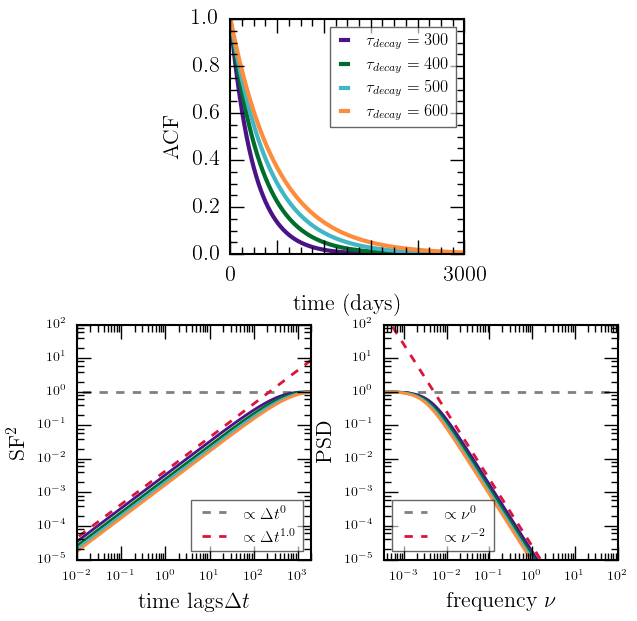

In [1264]:
grid = plt.GridSpec(2, 4, wspace=0.9, hspace=0.3)
ax = plt.subplot(grid[0, 1:3])
    


ax.set_xlabel(r"time (days)")
ax.set_ylabel('ACF')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.xaxis.set_ticklabels(["0", "","", "","", "3000"])

ax2 = plt.subplot(grid[1, :2])
ax2.plot([lags.min(),lags.max()] ,[1.,1.], color = "grey",linestyle = "--",lw = 2, label = r"$\propto \Delta t^{0}$"  )
ax2.plot(lags,lags**1./2.3e2, color = "crimson",linestyle = "--", label = r"$\propto \Delta t^{1.0}$"  )
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_ylim(1e-5,1e2)
ax2.set_xlim(1e-2,2e3)
ax2.set_xlabel(r"time lags$\Delta t$")
ax2.set_ylabel('SF$^{2}$')
ax2.xaxis.set_tick_params(labelsize = 10)
ax2.yaxis.set_tick_params(labelsize = 10)
plt.legend(loc = "lower right", handlelength = 2,fontsize = 12,framealpha = 0.6)

ax3 = plt.subplot(grid[1, 2:])
ax3.plot([freq.min(),freq.max()] ,[1.,1.], color = "grey",linestyle = "--",lw = 2, label = r"$\propto \nu^{0}$"  )
ax3.plot(freq,freq**-2./4e4, color = "crimson",linestyle = "--", label = r"$\propto \nu^{-2}$"  )
ax3.set_xscale("log")
ax3.set_yscale("log")
ax3.xaxis.set_tick_params(labelsize = 10)
ax3.yaxis.set_tick_params(labelsize = 10)

ax3.set_ylim(1e-5,1e2)
ax3.set_xlim(freq.min(),1./1e-2)
plt.legend(loc = "lower left", handlelength = 2,fontsize = 12,framealpha = 0.6)
ax3.set_xlabel(r"frequency $\nu$")
ax3.set_ylabel('PSD')





purples = ['#4a1486','#006d2c','#41b6c4','#fd8d3c']

#purples = ['#4a1486','#6a51a3','#807dba','#9e9ac8','#bcbddc']
decay = [300., 400., 500., 600.]
i = 0
for timescale in decay:
    lags, ACF, SF, freq, PSD = tripleThreat(decay = timescale, length = 3000.)
    ax2.plot(lags,SF/SF.max()  , linewidth = 2, color = purples[i])
    ax3.plot(freq,PSD/PSD.max() , linewidth = 2, color = purples[i])
    ax.plot(lags, ACF  , linewidth = 3,label = r"$\tau_{decay} = %.0f$"%(timescale), color = purples[i])
    i = i+1
ax.legend(loc = "upper right", handlelength = 1,fontsize = 12, framealpha = 0.6)
plt.savefig('SF0.pdf', dpi = 200)
#plt.tight_layout()

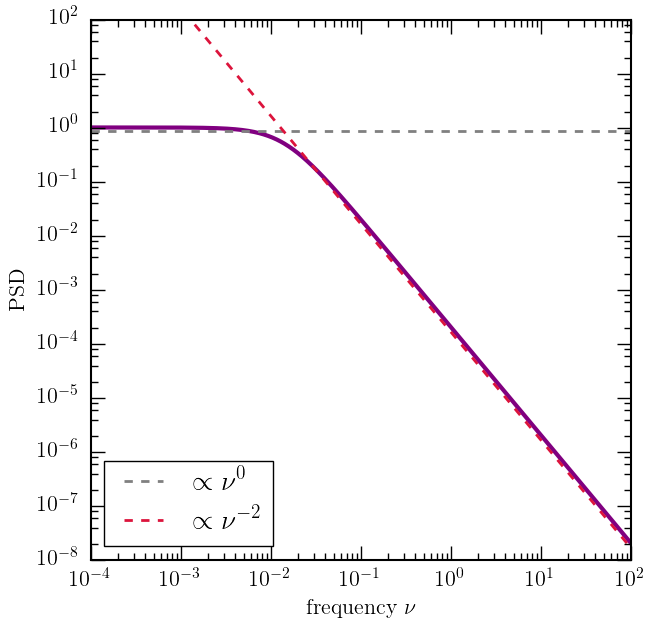

In [4]:
freq0 = np.linspace(-4, 3,1000)
freq = np.power(10., freq0)
b0 = 0.2

a1, a2 = 0.03939692,  0.00027941
bluePSD = (b0**2)
Denom = (a1 + 2.*np.pi**4 * freq**2)
ax = plt.subplot(1,1,1) 
ax.plot(freq,bluePSD/Denom , color = "purple" , linewidth = 3, )
ax.plot([freq.min(),freq.max()] ,[bluePSD*22,bluePSD*22], color = "grey",linestyle = "--",lw = 2, label = r"$\propto \nu^{0}$"  )
ax.plot(freq,freq**-2./6e3, color = "crimson",linestyle = "--", label = r"$\propto \nu^{-2}$"  )

ax.set_xscale("log")
ax.set_yscale("log")
plt.ylim(1e-8,1e2)
plt.xlim(1e-4,1e2)
plt.legend(loc = "lower left", fontsize = 20)
plt.xlabel(r"frequency $\nu$")
plt.ylabel('PSD')
#plt.savefig("./PSDgrid3.pdf", dpi = 200)

# DHO PSD is dominated by more than one scaling relationship, DHO slope is not fixed like the DRW

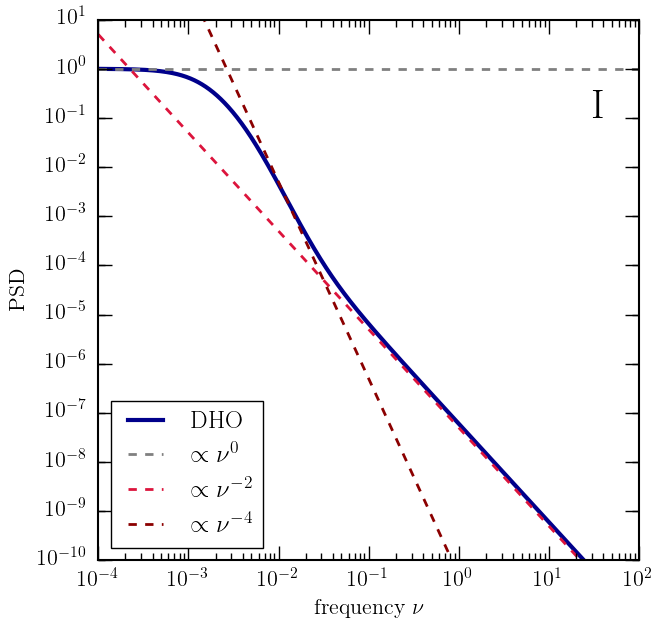

In [5]:
b0, b1 = 0.0046724,  0.0256982 

a1, a2 = 0.03939692,  0.00027941
bluePSD = 1./(2.*np.pi)*(b0**2.+4.*np.pi**2.*b1**2.*freq**2.)
Denom = (16.*np.pi**4 * freq**4) + ((4.*np.pi**2 * freq**2) * (a1**2 - (2.*a2)))+ a2**2
ax = plt.subplot(1,1,1)
dhopsd = bluePSD/Denom
ax.plot(freq,dhopsd/dhopsd.max()  , color = "darkblue" ,linewidth = 3, label = "DHO")
ax.plot([freq.min(),freq.max()] ,[1,1], color = "grey",linestyle = "--",lw = 2, label = r"$\propto \nu^{0}$"  )

ax.plot(freq,freq**-2./2e7, color = "crimson",linestyle = "--", label = r"$\propto \nu^{-2}$"  )
ax.plot(freq,freq**-4./2e10, color = "darkred",linestyle = "--", label = r"$\propto \nu^{-4}$"  )
ax.text(30,1e-1, "I", fontsize = 30)
ax.set_xscale("log")
ax.set_yscale("log")
plt.ylim(1e-10,1e1)
#plt.ylim(1e-11,1e2)
plt.xlim(1e-4,1e2)
plt.legend(loc = "lower left", fontsize = 18)
plt.xlabel(r"frequency $\nu$")
plt.ylabel('PSD')
#plt.savefig("./PSDgrid4.pdf", dpi = 200)

# DHO PSD with higher quality factor or resonance

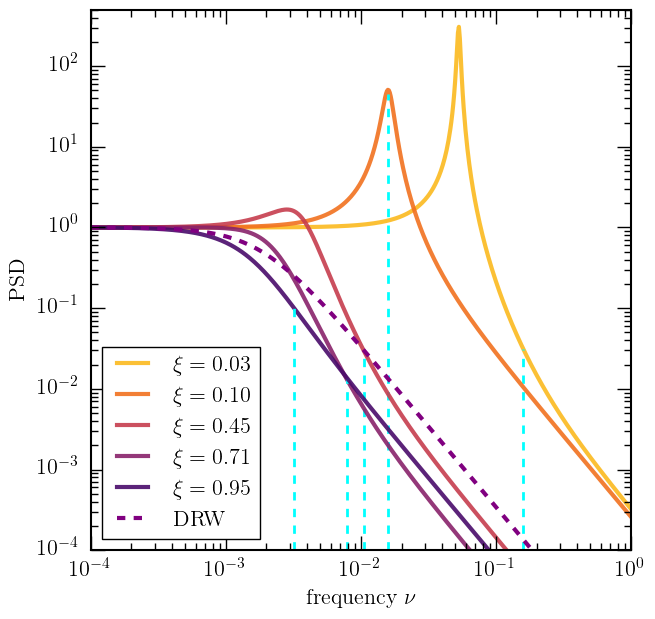

In [86]:
import math
import cmath
cmap = plt.get_cmap('inferno_r')

c1 = cmap.colors[0]
c2 = cmap.colors[1]

rnp = len(cmap.colors)

part_colors = np.zeros((rnp, 4))

part_colors[:,3] = 0.9 # set the alpha = 0.5

part_colors[:,:3] = cmap.colors #





freq0 = np.linspace(-4, 3,1000)

T = [3,10,50,100,300]
blue =  np.array([1,10,15,20,50])

c = 0
ax = plt.subplot(1,1,1)
for OT in T:
    c = c+1
    Rho = np.array([complex(-1.0/100.0, (1.)/OT), complex(-1.0/100.0, -(1.)/OT), -1.0/blue[c-1], 1.0])
    Theta = kali.carma.coeffs(2, 1, Rho)
    b0, b1 = Theta[-2],Theta[-1]
    bluePSD = 1./(2.*np.pi)*(b0**2.+4.*np.pi**2.*b1**2.*freq**2.)

    a1, a2 = Theta[0],Theta[1]
    damp = a1/(2*np.sqrt(a2))
    Denom = (16.*np.pi**4 * freq**4) + ((4.*np.pi**2 * freq**2) * (a1**2 - (2.*a2)))+ a2**2
    # %.2f$"%(
    dhopsd = bluePSD/Denom
    ax.plot(freq,dhopsd/dhopsd[0]  , color = part_colors[c*40,:] ,linewidth = 3, label = r"$\xi =%.2f$"%(damp))
    #ax.plot(freq,dhopsd/dhopsd[0]  , color = part_colors[c*40,:] ,linewidth = 3, label = R"$T_{QPO}$ ="+str(OT))

    value = np.where(np.isclose(freq[:],1./(blue[c-1]*2.*np.pi), atol=1e-3 ) == True)[0]
    
    if len(value)==0:
        value = np.where(np.isclose(freq[:],1./(blue[c-1]*2.*np.pi), atol=9e-1 ) == True)[0]
        avgP = np.nanmean(dhopsd[value[:]])
    else: 
        avgP = np.nanmean(dhopsd[value[:]])
    #plt.plot([b0/b1/2/np.pi,b0/b1/2/np.pi], [1e-4,avgP/dhopsd[0]],  c = "cyan", linestyle = '--', zorder = 7)
    #plt.scatter(1./(5.*OT), .798, marker = "+", s = 200, color = "magenta")
    plt.plot([1./(blue[c-1]*2.*np.pi),1./(2.*blue[c-1]*np.pi)], [1e-4,avgP/dhopsd[0]], c = "cyan", linestyle = '--')
#plt.text(b0/b1/2/np.pi*1.1 ,2e2,  r"$\frac{1}{2\pi}\frac{\beta_0}{\beta_1}$",fontsize = 20)
#plt.text(freq[50],5e1,  r"$\tau_{decay} = 100$", fontsize = 16)
#plt.plot([2*np.pi/damp,2*np.pi/damp] ,[1e-8,1.5], c = 'r', linestyle = '--')

#plt.text(3e-4,2e2, "III", fontsize = 30)
drw_top = (b0**2)
drwDenom = (1/1500.+ 2.*np.pi**4 * freq**2)
drwPSD = drw_top/drwDenom
ax.plot(freq,drwPSD/drwPSD.max() , color = "purple" , linestyle = "--", linewidth = 3, label = r"DRW" )
#plt.scatter(1/1500., .798, marker = "+", s = 2000)


ax.set_xscale("log")
ax.set_yscale("log")
plt.ylim(1e-4,5e2)
plt.xlim(1e-4,1.)
plt.legend( loc = "lower left", handlelength = 2, fontsize = 16)
plt.xlabel(r"frequency $\nu$")
plt.ylabel('PSD')
plt.savefig("./PSDqpo.pdf", dpi = 200)

# DHOs with Real roots! have slopes that are less steep than the DRW

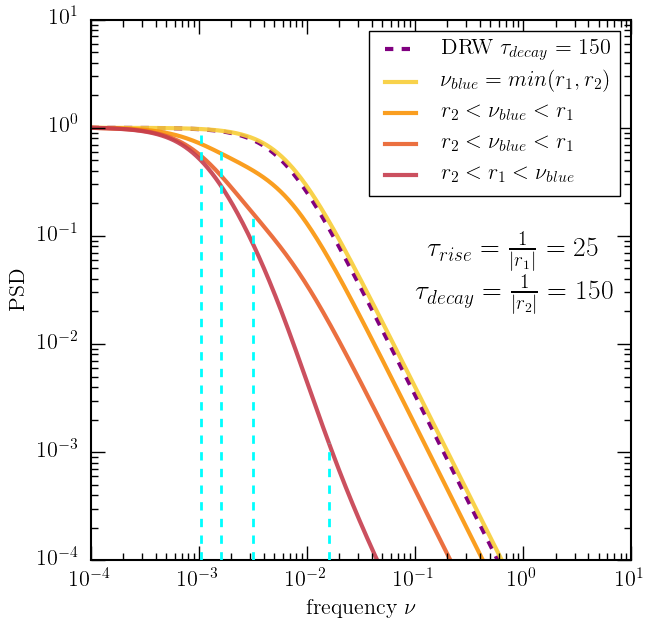

In [72]:
freq0 = np.linspace(-4, 3,1000)
freq = np.power(10., freq0)
b0, b1 = 0.046724,  0.0256982 
T = 500.
#damp = [1.,5.,10.,50.]
damp = [25.]

rise = 150.
c = 0
ax = plt.subplot(1,1,1)
drw_top = (b0**2)
drwDenom = (1/150.+ 2.*np.pi**4 * freq**2)
drwPSD = drw_top/drwDenom
ax.plot(freq,drwPSD/drwPSD.max() , color = "purple" , linestyle = "--", linewidth = 3, label = r"DRW $\tau_{decay} = 150$" )
"""
for decay in damp:
    c = c+1
    Rho = np.array([ (-1.0/rise),(-1.0/decay), -1.0/500.0, 0.5])
    Theta = kali.carma.coeffs(2, 1, Rho)
    b0, b1 = Theta[-2],Theta[-1]
    bluePSD = 1./(2.*np.pi)*(b0**2.+4.*np.pi**2.*b1**2.*freq**2.)

    a1, a2 = Theta[0],Theta[1]
    Denom = (16.*np.pi**4 * freq**4) + ((4.*np.pi**2 * freq**2) * (a1**2 - (2.*a2)))+ a2**2
    dhopsd = bluePSD/Denom
    ax.plot(freq,dhopsd/dhopsd[0]  , color = part_colors[c*40,:] ,linewidth = 3, label = r"$\nu_{blue}=%.0e$"%(b0/b1/2/np.pi))
    value = np.where(np.isclose(freq[:],b0/b1/2/np.pi, atol=1e-3 ) == True)[0]
    
    if len(value)==0:
        value = np.where(np.isclose(freq[:],b0/b1/2/np.pi, atol=9e-1 ) == True)[0]
        avgP = np.nanmean(dhopsd[value[:]])
    else: 
        avgP = np.nanmedian(dhopsd[value[:]])
        #avgP = (dhopsd[value[0]])
    plt.plot([b0/b1/2/np.pi,b0/b1/2/np.pi], [1e-4,avgP/dhopsd[0]],  c = "cyan", linestyle = '--', zorder = 7)
 """   
    

#c = 0
for decay in damp:
    c = c+1
    Rho = np.array([ (-1.0/rise),(-1.0/decay), -1.0/150.0, 0.5])
    Theta = kali.carma.coeffs(2, 1, Rho)
    b0, b1 = Theta[-2],Theta[-1]
    bluePSD = 1./(2.*np.pi)*(b0**2.+4.*np.pi**2.*b1**2.*freq**2.)

    a1, a2 = Theta[0],Theta[1]
    Denom = (16.*np.pi**4 * freq**4) + ((4.*np.pi**2 * freq**2) * (a1**2 - (2.*a2)))+ a2**2
    dhopsd = bluePSD/Denom
    #r"$\nu_{blue} = max(r_1,r_2)$
    ax.plot(freq,dhopsd/dhopsd[0]  , color = part_colors[c*30,:] ,linewidth = 3,label = r"$\nu_{blue} = min(r_1,r_2)$")

    #ax.plot(freq,dhopsd/dhopsd[0]  , color = part_colors[c*30,:] ,linewidth = 3,label = r"$\nu_{blue}=%.0e$"%(b0/b1/2/np.pi))
    value = np.where(np.isclose(freq[:],b0/b1/2/np.pi, atol=1e-3 ) == True)[0]
    
    if len(value)==0:
        value = np.where(np.isclose(freq[:],b0/b1/2/np.pi, atol=9e-1 ) == True)[0]
        avgP = np.nanmean(dhopsd[value[:]])
    else: 
        avgP = np.nanmean(dhopsd[value[:]])
    plt.plot([b0/b1/2/np.pi,b0/b1/2/np.pi], [1e-4,avgP/dhopsd[0]],  c = "cyan", linestyle = '--', zorder = 7)
    
    
    
#c = 0
for decay in damp:
    c = c+1
    Rho = np.array([ (-1.0/rise),(-1.0/decay), -1.0/100.0, 0.5])
    Theta = kali.carma.coeffs(2, 1, Rho)
    b0, b1 = Theta[-2],Theta[-1]
    bluePSD = 1./(2.*np.pi)*(b0**2.+4.*np.pi**2.*b1**2.*freq**2.)

    a1, a2 = Theta[0],Theta[1]
    Denom = (16.*np.pi**4 * freq**4) + ((4.*np.pi**2 * freq**2) * (a1**2 - (2.*a2)))+ a2**2
    dhopsd = bluePSD/Denom
    ax.plot(freq,dhopsd/dhopsd[0]  , color = part_colors[c*30,:] ,linewidth = 3, label = r"$r_2 < \nu_{blue} < r_1$")

    #ax.plot(freq,dhopsd/dhopsd[0]  , color = part_colors[c*30,:] ,linewidth = 3, label = r"$\nu_{blue}=%.0e$"%(b0/b1/2/np.pi))
    value = np.where(np.isclose(freq[:],b0/b1/2/np.pi, atol=1e-3 ) == True)[0]
    
    if len(value)==0:
        value = np.where(np.isclose(freq[:],b0/b1/2/np.pi, atol=9e-1 ) == True)[0]
        avgP = np.nanmean(dhopsd[value[:]])
    else: 
        avgP = np.nanmean(dhopsd[value[:]])
    plt.plot([b0/b1/2/np.pi,b0/b1/2/np.pi], [1e-4,avgP/dhopsd[0]],  c = "cyan", linestyle = '--', zorder = 7)

for decay in damp:
    c = c+1
    Rho = np.array([ (-1.0/rise),(-1.0/decay), -1.0/50.0, 0.5])
    Theta = kali.carma.coeffs(2, 1, Rho)
    b0, b1 = Theta[-2],Theta[-1]
    bluePSD = 1./(2.*np.pi)*(b0**2.+4.*np.pi**2.*b1**2.*freq**2.)

    a1, a2 = Theta[0],Theta[1]
    Denom = (16.*np.pi**4 * freq**4) + ((4.*np.pi**2 * freq**2) * (a1**2 - (2.*a2)))+ a2**2
    dhopsd = bluePSD/Denom
    #ax.plot(freq,dhopsd/dhopsd[0]  , color = part_colors[c*30,:] ,linewidth = 3, label = r"$\nu_{blue}=%.0e$"%(b0/b1/2/np.pi))

    ax.plot(freq,dhopsd/dhopsd[0]  , color = part_colors[c*30,:] ,linewidth = 3, label = r"$r_2 < \nu_{blue} < r_1$")
    value = np.where(np.isclose(freq[:],b0/b1/2/np.pi, atol=1e-3 ) == True)[0]
    
    if len(value)==0:
        value = np.where(np.isclose(freq[:],b0/b1/2/np.pi, atol=9e-1 ) == True)[0]
        avgP = np.nanmean(dhopsd[value[:]])
    else: 
        avgP = np.nanmean(dhopsd[value[:]])
    plt.plot([b0/b1/2/np.pi,b0/b1/2/np.pi], [1e-4,avgP/dhopsd[0]],  c = "cyan", linestyle = '--', zorder = 7)

    
for decay in damp:
    c = c+1
    Rho = np.array([ (-1.0/rise),(-1.0/decay), -1.0/10.0, 0.5])
    Theta = kali.carma.coeffs(2, 1, Rho)
    b0, b1 = Theta[-2],Theta[-1]
    bluePSD = 1./(2.*np.pi)*(b0**2.+4.*np.pi**2.*b1**2.*freq**2.)

    a1, a2 = Theta[0],Theta[1]
    Denom = (16.*np.pi**4 * freq**4) + ((4.*np.pi**2 * freq**2) * (a1**2 - (2.*a2)))+ a2**2
    dhopsd = bluePSD/Denom
    #ax.plot(freq,dhopsd/dhopsd[0]  , color = part_colors[c*30,:] ,linewidth = 3, label = r"$\nu_{blue}=%.0e$"%(b0/b1/2/np.pi))

    ax.plot(freq,dhopsd/dhopsd[0]  , color = part_colors[c*30,:] ,linewidth = 3, label = r"$r_2 < r_1 <\nu_{blue}$")
    value = np.where(np.isclose(freq[:],b0/b1/2/np.pi, atol=1e-3 ) == True)[0]
    
    if len(value)==0:
        value = np.where(np.isclose(freq[:],b0/b1/2/np.pi, atol=9e-1 ) == True)[0]
        avgP = np.nanmean(dhopsd[value[:]])
    else: 
        avgP = np.nanmean(dhopsd[value[:]])
    plt.plot([b0/b1/2/np.pi,b0/b1/2/np.pi], [1e-4,avgP/dhopsd[0]],  c = "cyan", linestyle = '--', zorder = 7)
    #plt.scatter(2*np.pi/decay,dhopsd.max()/dhopsd[0],color = part_colors[c*40,:] , marker = "+", s = 100)    
#plt.plot([b0/b1/2/np.pi,b0/b1/2/np.pi], [1e-8,2e-1], c = "cyan", linestyle = '--')

plt.text(.13 ,5e-2,r"$\tau_{rise} = \frac{1}{|r_1|}= 25$", fontsize = 20)
plt.text(.1 ,2e-2,r"$\tau_{decay} =\frac{1}{|r_2|}= 150$", fontsize = 20)


ax.set_xscale("log")
ax.set_yscale("log")
plt.ylim(1e-4,10)
plt.xlim(1e-4,1e1)
plt.legend( loc = "upper right", handlelength = 2, fontsize = 16)

plt.xlabel(r"frequency $\nu$")
plt.ylabel('PSD')
plt.savefig("./PSDrise.pdf", dpi = 200)

# DHO with blue timescale > QPO period

0.00730057521377
0.0580153181995
0.31364548786
0.854365166885
1.49490136108


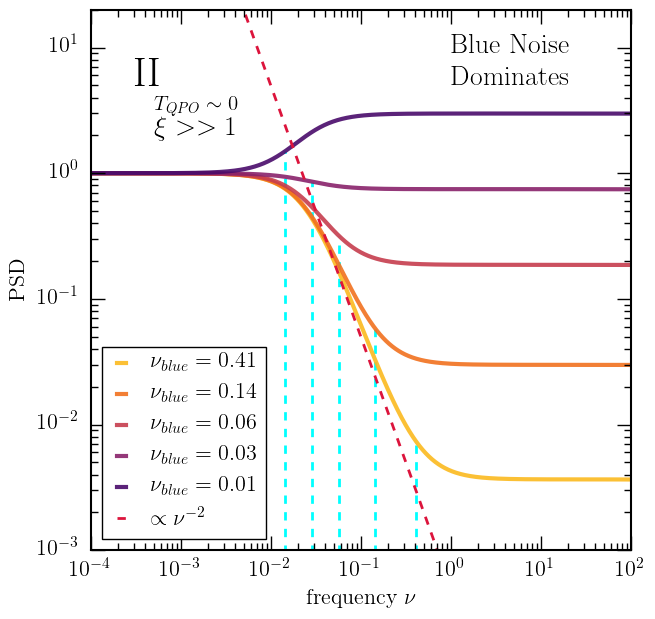

In [15]:
freq0 = np.linspace(-4, 3,1000)
freq = np.power(10., freq0)

b0  = 0.046724
b1 = 0.0256982 * np.array([.7,2.,5,10,20])

T = 0.1

damp = 200
c = 0
a1, a2 = 2*damp*(2*np.pi/T),  (2*np.pi/T)**2
Denom = (16.*np.pi**4 * freq**4) + ((4.*np.pi**2 * freq**2) * (a1**2 - (2.*a2)))+ a2**2


ax = plt.subplot(1,1,1)
for blue in b1:
    c = c+1
    bluePSD = 1./(2.*np.pi)*(b0**2.+4.*np.pi**2.*blue**2.*freq**2.)
    dhopsd = bluePSD/Denom
    #ax.plot(freq,dhopsd/dhopsd[0]  , color = part_colors[c*40,:] ,linewidth = 3, label = r"$\nu_{blue} = max(r_1,r_2)$")

    ax.plot(freq,dhopsd/dhopsd[0]  , color = part_colors[c*40,:] ,linewidth = 3, label = r"$\nu_{blue} = %.2f$"%(b0/blue/2/np.pi))
    value = np.where(np.isclose(freq[:],b0/blue/2/np.pi, atol=1e-3 ) == True)[0]
    
    if len(value)==0:
        value = np.where(np.isclose(freq[:],b0/blue/2/np.pi, atol=9e-1 ) == True)[0]
        avgP = np.nanmean(dhopsd[value[:]])
    else: 
        avgP = np.nanmean(dhopsd[value[:]])
    plt.plot([b0/blue/2/np.pi,b0/blue/2/np.pi], [1e-8,avgP/dhopsd[0]], c = "cyan", linestyle = '--', zorder = 0)
    print(avgP/dhopsd[0])
#ax.plot([freq.min(),freq.max()] ,[1,1], color = "grey",linestyle = "--", label = r"$\propto \nu^{0}$"  )

#ax.plot(freq,freq**-2./2e7, color = "crimson",linestyle = "--", label = r"$\propto \nu^{-2}$"  )
#ax.plot(freq,freq**-4./2e10, color = "darkred",linestyle = "--", label = r"$\propto \nu^{-4}$"  )
#plt.scatter(b0/b1 ,2e-1, marker = r"$\beta_0/\beta_1 = 5$", s = 2000)
plt.text(freq[100] ,3, r"$T_{QPO} \sim 0$",fontsize = 15)
plt.text(freq[100] ,2,r"$\xi >> 1$", fontsize = 20)
plt.text(1 ,9,r"Blue Noise", fontsize = 20)
plt.text(1 ,5,r"Dominates", fontsize = 20)
plt.text(3e-4,5, "II", fontsize = 30)

ax.plot(freq,freq**-2./2e3, color = "crimson",linestyle = "--", label = r"$\propto \nu^{-2}$"  )




ax.set_xscale("log")
ax.set_yscale("log")
plt.ylim(1e-3,2e1)
plt.xlim(1e-4,1e2)
plt.legend( loc = "lower left", handlelength = 1, fontsize = 16)
plt.xlabel(r"frequency $\nu$")
plt.ylabel('PSD')
plt.savefig("./PSDblue.pdf", dpi = 200)



# using the blue timescale to make the QPO resonate

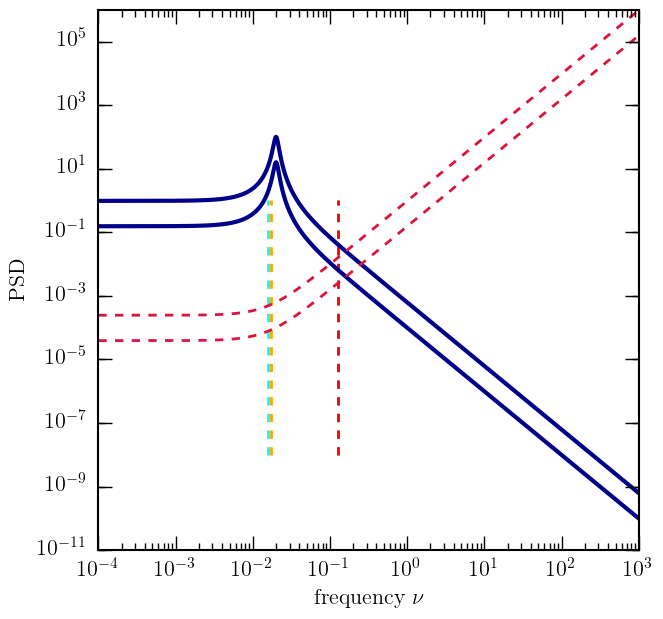

In [573]:
freq0 = np.linspace(-4, 3,10000)
freq = np.power(10., freq0)
a1, a2, b0, b1 = 0.02 , 0.01589137 , 0.01566871 , 0.15668706


bluePSD = 1./(2.*np.pi)*(b0**2.+4.*np.pi**2.*b1**2.*freq**2.)
bluePSD2 = (b0 + b1*(2*np.pi*1j*freq))*np.conj(b0 + b1*(2*np.pi*1j*freq))
Denom = (16.*np.pi**4 * freq**4) + ((4.*np.pi**2 * freq**2) * (a1**2 - (2.*a2)))+ a2**2
exp  = (a2 + (a1*2*np.pi*1j*freq) - (2*np.pi*freq)**2)
Denom2 = exp * np.conj(exp)
ax = plt.subplot(1,1,1)
dhopsd2 = bluePSD2/Denom2
dhopsd = bluePSD/Denom
ax.plot(freq,dhopsd  , color = "darkblue" ,linewidth = 3, label = "DHO")
ax.plot(freq,dhopsd2  , color = "darkblue" ,linewidth = 3, label = "DHO")

#ax.plot([freq.min(),freq.max()] ,[1,1], color = "grey",linestyle = "--", label = r"$\propto \nu^{0}$"  )
ax.plot(freq,bluePSD2 , color = "crimson",linestyle = "--", label = r"$\propto \nu^{-2}$"  )
ax.plot(freq,bluePSD , color = "crimson",linestyle = "--", label = r"$\propto \nu^{-2}$"  )
plt.plot([b0/b1/2/np.pi,b0/b1/2/np.pi], [1e-8,1], c = "cyan", linestyle = '--', zorder = 0)
plt.plot([np.sqrt(a2),np.sqrt(a2)], [1e-8,1], c = "cyan", linestyle = '--', zorder = 0)
omega = np.sqrt(a2)/(2.*np.pi)
damp = a1/2./omega
oscf = omega*np.sqrt(1.-damp**2.)
plt.plot([oscf,oscf], [1e-8,1], c = "orange", linestyle = '--', zorder = 0)
plt.plot([2*np.pi/50.,2*np.pi/50.], [1e-8,1], c = "red", linestyle = '--', zorder = 0)



ax.set_xscale("log")
ax.set_yscale("log")
plt.xlabel(r"frequency $\nu$")
plt.ylabel('PSD')    
    
    

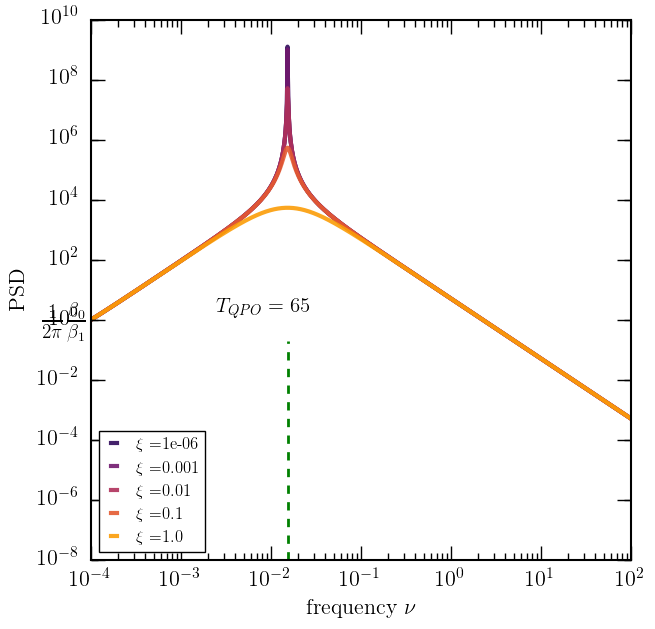

In [568]:
freq0 = np.linspace(-4, 3,1000)
freq = np.power(10., freq0)
b0, b1 = 0.046724,  0.0256982 *3
T = 65

freq0 = np.linspace(-4, 3,1000)
b0, b1 = 0.046724,  0.0256982 *10000.
T = 65.
oscf = 1./T 
damp = [.000001,.001,.01,.1,1.]
c = 0
bluePSD = 1./(2.*np.pi)*(b0**2.+4.*np.pi**2.*b1**2.*freq**2.)
ax = plt.subplot(1,1,1)
for decay in damp:
    c = c+1
    a1, a2 = 2*decay*(2*np.pi/T),  (2*np.pi/T)**2
    Denom = (16.*np.pi**4 * freq**4) + ((4.*np.pi**2 * freq**2) * (a1**2 - (2.*a2)))+ a2**2

    dhopsd = bluePSD/Denom
    ax.plot(freq,dhopsd/dhopsd[0]  , color = part_colors[c*40,:] ,linewidth = 3, label = r"$\xi$ ="+str(decay))
    #plt.plot([np.sqrt(a2),np.sqrt(a2)], [1e-8,1], c = "cyan", linestyle = '--', zorder = 0)

    #plt.scatter(2*np.pi/decay,dhopsd.max()/dhopsd[0],color = part_colors[c*40,:] , marker = "+", s = 100)

#ax.plot([freq.min(),freq.max()] ,[1,1], color = "grey",linestyle = "--", label = r"$\propto \nu^{0}$"  )

#ax.plot(freq,freq**-2./2e7, color = "crimson",linestyle = "--", label = r"$\propto \nu^{-2}$"  )
#ax.plot(freq,freq**-4./2e10, color = "darkred",linestyle = "--", label = r"$\propto \nu^{-4}$"  )
plt.plot([b0/b1/2/np.pi,b0/b1/2/np.pi], [1e-8,2e-1], c = "cyan", linestyle = '--')
plt.plot([oscf,oscf], [1e-8,2e-1], c = "green", linestyle = '--')

plt.text(b0/(b1*2.*np.pi) ,2e-1,  r"$\frac{1}{2\pi}\frac{\beta_0}{\beta_1}$",fontsize = 20)
plt.text(oscf/(2*np.pi),1.5, r"$T_{QPO} = 65$", fontsize = 15)



ax.set_xscale("log")
ax.set_yscale("log")
#plt.ylim(1e-8,3e1)
plt.xlim(1e-4,1e2)
plt.legend( loc = "lower left", handlelength = 1)
plt.xlabel(r"frequency $\nu$")
plt.ylabel('PSD')

# Several Cells below explore DHO models of various parameters in PSD space
(code not tested by external user, may not compile without certain key files that are not provided. Please only use as a preview not a workbook )

In [ ]:
def simLC(decay, qpo = None, rise = None, blue = None, p  = 1, q = 0):
    if blue == None:
        print("DRW model")
        Rho = np.array([(-1.0/decay),  1.0])
    else:    
        if qpo == None:
            print("DHO REAL ROOTS MODEL")
            blue = blue*np.sqrt(2)*np.pi
            Rho = np.array([(-1.0/decay), (-1.0/rise), (-1.0/blue), 1.0])
        if rise == None:
            print("DHO COMPLEX ROOTS MODEL")
            Rho = np.array([complex(-1.0/decay, (1.)/qpo), complex(-1.0/decay, -(1.)/qpo), -1.0/blue, 1.0])
    Theta = kali.carma.coeffs(p, q, Rho)
    nt = kali.carma.CARMATask(p, q)
    nt.set(0.02,Theta)
    LC = nt2.simulate(duration=3000)
    return LC

In [88]:
def overdamp(decay = 100., OT = 25.,blue = 5.0 ,color = 1, alpha = 1.0,label = None, amp = 0.36025, ax = ax, plotRed = False):
    
    cmap = plt.get_cmap('inferno')

    c1 = cmap.colors[0]
    c2 = cmap.colors[1]

    rnp = len(cmap.colors)

    part_colors = np.zeros((rnp, 4))

    part_colors[:,3] = 0.7 # set the alpha = 0.5

    part_colors[:,:3] = cmap.colors # set the particle colors to inferno
    b1 = amp
    
    Rho = np.array([complex(-1.0/decay, (1.)/OT), complex(-1.0/decay, -(1.)/OT), -1.0/blue, 1.0])
    Theta = kali.carma.coeffs(2, 1, Rho)
    nt2 = kali.carma.CARMATask(2, 1)
    nt2.set(0.02,Theta)
    lagsM_dho_damped, sfM_dho_damped = nt2.sf(num=10000,start=0., stop=10000.0)
    #Sf
    ax.plot(lagsM_dho_damped, sfM_dho_damped, color = part_colors[color,:], linewidth  = 3,alpha = alpha, label = label)
    
    #blue dashed lines
    value = np.where(np.isclose(lagsM_dho_damped,blue/(np.sqrt(2)*np.pi), atol=1e-10 ) == True)[0]
    if len(value)==0:
        value = np.where(np.isclose(lagsM_dho_damped,blue/(np.sqrt(2)*np.pi), atol=9e-1 ) == True)[0]
        avgP = np.nanmean(sfM_dho_damped[value[:]])
    else: 
        print(len(value))
        avgP = np.nanmean(sfM_dho_damped[value[:]])
    ax.plot([blue/(np.sqrt(2)*np.pi),blue/(np.sqrt(2)*np.pi)], [sfM_dho_damped.min(),avgP], c = "cyan", lw = 3,linestyle = '--', zorder = 0)
    
    if plotRed == True:
        redvalue = np.where(np.isclose(lagsM_dho_damped,OT*np.sqrt(2), atol=1e-6) == True)[0]
        if len(redvalue)==0:
            redvalue = np.where(np.isclose(lagsM_dho_damped,OT*np.sqrt(2), atol=9e-1 ) == True)[0]
            redavgP = np.nanmean(sfM_dho_damped[redvalue[:]])
        else: 
            redavgP = np.nanmean(sfM_dho_damped[redvalue[:]])
            print(len(value),redavgP)
        #RED DASHED LINE FOR DECAY TIMESCALE
        ax.plot([OT*np.sqrt(2),OT*np.sqrt(2)], [sfM_dho_damped.min(),redavgP], c = "darkred",lw = 3, linestyle = '--', zorder = 0)
        #ax.plot(lagsM_dho_damped, acfM_dho_damped, color = part_colors[color,:], linewidth  = 3,alpha = alpha, label = label)




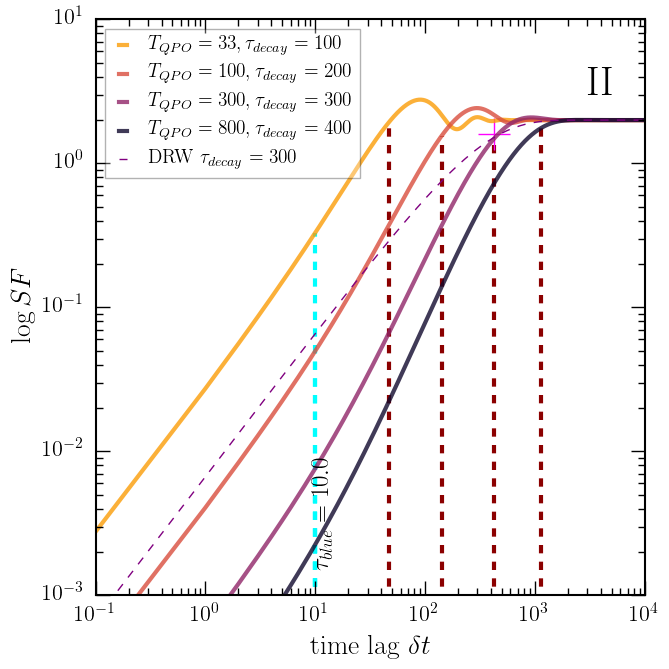

In [1398]:
decay = np.array([100.,200., 300., 400])
OT = decay[:]/np.array([3.,2.,1., 0.5])



blue = 10.*(np.sqrt(2.)*np.pi)
blueT = blue/(np.sqrt(2.)*np.pi)
ax2 = plt.subplot(1,1,1) 
overdamp(OT = OT[0],decay = decay[0], blue = blue, color =4*50,  alpha = 0.8, label = r"$T_{QPO} = %0.f, \tau_{decay} = %0.f$"%(OT[0],decay[0]), ax = ax2, plotRed = True)
overdamp(OT = OT[1],decay = decay[1], blue = blue, color =3*50,  alpha = 0.8, label = r"$T_{QPO} = %0.f, \tau_{decay} = %0.f$"%(OT[1],decay[1]),ax = ax2, plotRed = True)
overdamp(OT = OT[2],decay = decay[2], blue = blue, color =2*50,  alpha = 0.8, label = r"$T_{QPO} = %0.f, \tau_{decay} = %0.f$"%(OT[2],decay[2]),ax = ax2, plotRed = True)
overdamp(OT = OT[3],decay = decay[3], blue = blue, color =20, alpha = 0.8, label = r"$T_{QPO} = %0.f, \tau_{decay} = %0.f$"%(OT[3],decay[3]),ax = ax2, plotRed = True)
Rhodrw = np.array([(-1.0/300.), 1.0])
Thetadrw = kali.carma.coeffs(1, 0, Rhodrw)
ntdrw = kali.carma.CARMATask(1, 0)
ntdrw.set(0.02,Thetadrw)
lagsM_drw, sfM_drw = ntdrw.sf(num=10000,start=0., stop=10000.0)
ax2.plot(lagsM_drw, sfM_drw, color = 'purple', linewidth  = 1 ,linestyle = '--', label = r'DRW $\tau_{decay} = 300$')

plt.scatter(300*np.sqrt(2),sfM_drw.max()*0.795, color = 'magenta', marker = "+", s = 500)
plt.text(blueT,  7e-3, r"$\tau_{blue} = %0.1f$"%(blueT), fontsize = 18, rotation= 90)
plt.text(3e3,3, "II", fontsize = 30)




ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_xlim(1e-1,1e4)
ax2.set_ylim(1e-3,10)
ax2.set_xlabel(r'time lag $\delta t$', fontsize = 20)
ax2.set_ylabel(r'$\log SF$',fontsize = 20)
plt.legend(loc = "upper left",handlelength = 1, fontsize = 14, framealpha=0.3)
plt.tight_layout()
plt.savefig("./SFgrid1.pdf", dpi = 200)

DHO COMPLEX ROOTS MODEL
DHO COMPLEX ROOTS MODEL
DRW model


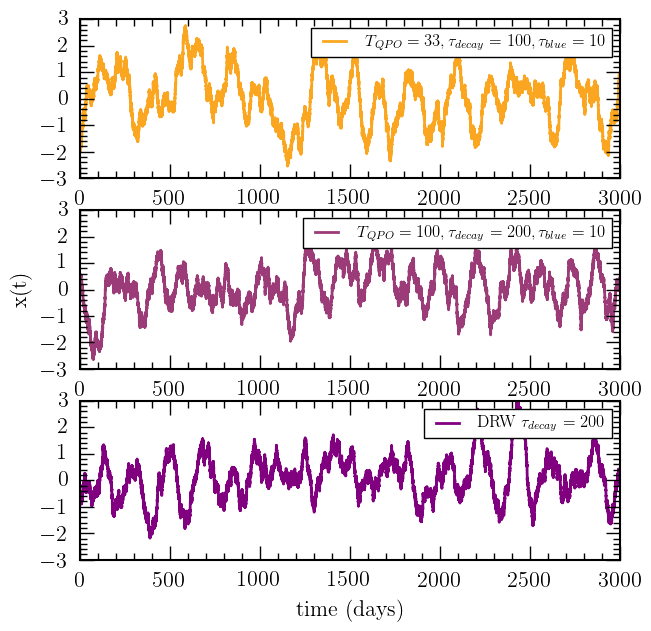

In [995]:
#show degeneracy    
cmap = plt.get_cmap('inferno')

c1 = cmap.colors[0]
c2 = cmap.colors[1]

rnp = len(cmap.colors)

part_colors = np.zeros((rnp, 4))

part_colors[:,3] = 0.9 # set the alpha = 0.5

part_colors[:,:3] = cmap.colors # set the particle colors to inferno
ax1 = plt.subplot(3,1,1)     
newlc = simLC(decay = 100., qpo = 33., rise = None, blue = 10., p  = 2, q = 1)  
ax1.plot(newlc.t, newlc.x,color =part_colors[4*50,:], label = r"$T_{QPO} = 33, \tau_{decay} = 100, \tau_{blue} = 10$")
ax1.set_ylim(-3,3)
plt.legend()
ax2 = plt.subplot(3,1,2) 
newlc2 = simLC(decay = 200., qpo = 100, rise = None, blue = 10., p  = 2, q = 1) 
ax2.plot(newlc2.t, newlc2.x, color =part_colors[2*50,:], label = r"$T_{QPO} = 100, \tau_{decay} = 200, \tau_{blue} = 10$")
ax2.set_ylabel("x(t)")
ax2.set_ylim(-3,3)
plt.legend()
ax3 = plt.subplot(3,1,3) 
newlc3 = simLC(decay = 200., p  = 1, q = 0) 
ax3.plot(newlc3.t, newlc3.x, color = "purple", label = r"DRW $\tau_{decay} = 200$")
ax3.set_xlabel("time (days)")
ax3.set_ylim(-3,3)
plt.legend()
plt.savefig('SF_qpolcs.pdf', dpi = 200)

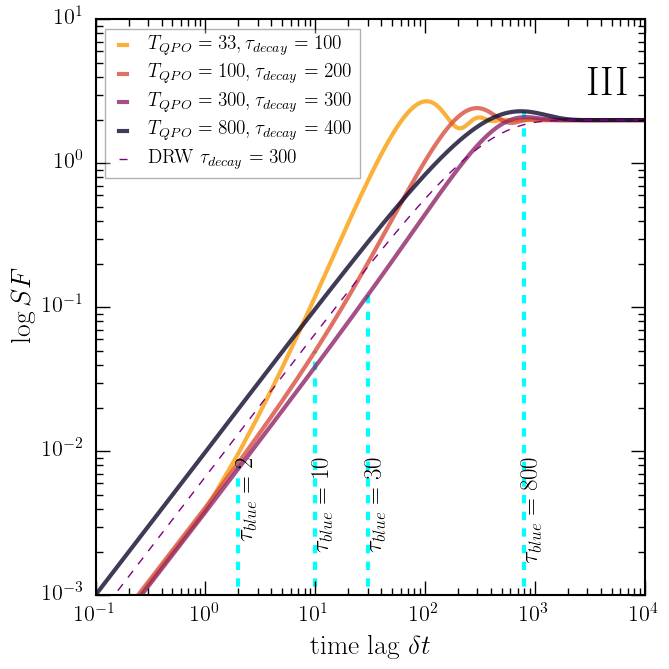

In [89]:
decay = np.array([100.,200., 300., 400])
OT = decay[:]/np.array([3.,2.,1., 0.5])

blue = np.array([ 2., 10., 30.,  800.])*np.sqrt(2)*np.pi
blueT = np.array(blue)/(np.sqrt(2)*np.pi)
ax2 = plt.subplot(1,1,1) 
overdamp(OT = OT[0],decay = decay[0], blue = blue[0],color =4*50,  alpha = 0.8, label = r"$T_{QPO} = %0.f, \tau_{decay} = %0.f$"%(OT[0],decay[0]), ax = ax2)
overdamp(OT = OT[1],decay = decay[1],blue = blue[1],color =3*50,  alpha = 0.8, label = r"$T_{QPO} = %0.f, \tau_{decay} = %0.f$"%(OT[1],decay[1]),ax = ax2)
overdamp(OT = OT[2],decay = decay[2],blue = blue[2], color =2*50,  alpha = 0.8, label = r"$T_{QPO} = %0.f, \tau_{decay} = %0.f$"%(OT[2],decay[2]),ax = ax2)
overdamp(OT = OT[3],decay = decay[3],blue = blue[3], color =20, alpha = 0.8, label = r"$T_{QPO} = %0.f, \tau_{decay} = %0.f$"%(OT[3],decay[-1]),ax = ax2)
#plt.text(decay+5, 3e-1, r"$\tau_{decay} = %0.f$"%(decay), fontsize = 18)
for B in blueT:
    plt.text(B, 7e-3, r"$\tau_{blue} = %0.f$"%(B), fontsize = 18,  rotation= 90, zorder = 12)
Rhodrw = np.array([(-1.0/300.), 1.0])
Thetadrw = kali.carma.coeffs(1, 0, Rhodrw)
ntdrw = kali.carma.CARMATask(1, 0)
ntdrw.set(0.02,Thetadrw)
lagsM_drw, sfM_drw = ntdrw.sf(num=10000,start=0., stop=10000.0)
ax2.plot(lagsM_drw, sfM_drw, color = 'purple', linewidth  = 1 ,linestyle = '--', label = r'DRW $\tau_{decay} = 300$')
plt.text(3e3,3, "III", fontsize = 30)


ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_xlim(1e-1,1e4)
ax2.set_ylim(1e-3,10)
ax2.set_xlabel(r'time lag $\delta t$', fontsize = 20)
ax2.set_ylabel(r'$\log SF$',fontsize = 20)
plt.legend(loc = "upper left",handlelength = 1, fontsize = 14, framealpha=0.3)
plt.tight_layout()
#plt.savefig("./SFgrid2.pdf", dpi = 200)

In [94]:
OT = 150
decay = 300
blue = np.array(OT/5., OT/25, OT/35])*np.sqrt(2)*np.pi
Rho = np.array([complex(-1.0/decay, (1.)/OT), complex(-1.0/decay, -(1.)/OT), -1.0/blue, 1.0])
Theta = kali.carma.coeffs(2, 1, Rho)
damp = Theta[0]/(2*math.sqrt(Theta[1]))
print damp

0.6


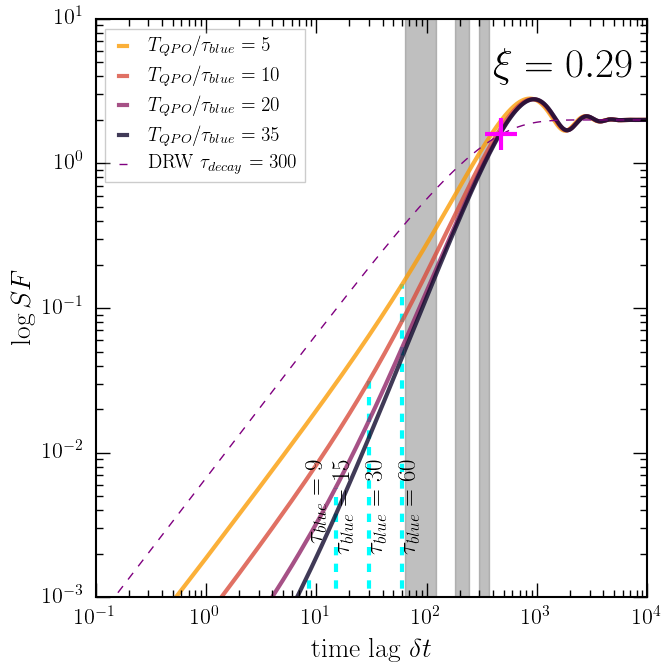

In [166]:


OT = 300
decay = 1000
blue0 = [5., 10, 20, 35]
blue = np.array([OT/5., OT/10.,OT/20. ,OT/35.])*np.sqrt(2)*np.pi
blueT = np.array(blue)/(np.sqrt(2)*np.pi)
Rho = np.array([complex(-1.0/decay, (1.)/OT), complex(-1.0/decay, -(1.)/OT), -1.0/1., 1.0])
Theta = kali.carma.coeffs(2, 1, Rho)
damp = Theta[0]/(2*math.sqrt(Theta[1]))

ax2 = plt.subplot(1,1,1) 
overdamp(OT = OT,decay = decay, blue = blue[0],color =4*50,  alpha = 0.8, label = r"$T_{QPO}/\tau_{blue} = %0.f$"%(blue0[0]), ax = ax2)
overdamp(OT = OT,decay = decay,blue = blue[1],color =3*50,  alpha = 0.8, label = r"$T_{QPO}/\tau_{blue} = %0.f$"%(blue0[1]),ax = ax2)
overdamp(OT = OT,decay = decay,blue = blue[2], color =2*50,  alpha = 0.8, label = r"$T_{QPO}/\tau_{blue} = %0.f$"%(blue0[2]),ax = ax2)
overdamp(OT = OT,decay = decay,blue = blue[3], color =20, alpha = 0.8, label = r"$T_{QPO}/\tau_{blue} = %0.f$"%(blue0[3]),ax = ax2)
#plt.text(decay+5, 3e-1, r"$\tau_{decay} = %0.f$"%(decay), fontsize = 18)
for B in blueT:
    plt.text(B, 7e-3, r"$\tau_{blue} = %0.f$"%(B), fontsize = 18,  rotation= 90, zorder = 12)
Rhodrw = np.array([(-1.0/300.), 1.0])
Thetadrw = kali.carma.coeffs(1, 0, Rhodrw)
ntdrw = kali.carma.CARMATask(1, 0)
ntdrw.set(0.02,Thetadrw)
lagsM_drw, sfM_drw = ntdrw.sf(num=10000,start=0., stop=10000.0)
ax2.plot(lagsM_drw, sfM_drw, color = 'purple', linewidth  = 1 ,linestyle = '--', label = r'DRW $\tau_{decay} = 300$')
plt.text(4e2,4, r"$\xi =%.2f$" %(damp), fontsize = 30)
plt.scatter(lagsM_drw[np.where(sfM_drw < sfM_drw.max()*0.795)[0][-1]],sfM_drw.max()*0.795, lw = 3,color = 'magenta', marker = "+", s = 500, zorder = 10)
plt.fill_between([10**1.8,10**2.08653],[1e-3,1e-3],[10,10] , color = 'grey', alpha = 0.5)
plt.fill_between([10**2.26,10**2.38],[1e-3,1e-3],[10,10] , color = 'grey', alpha = 0.5)
plt.fill_between([10**2.478,10**2.562],[1e-3,1e-3],[10,10] , color = 'grey', alpha = 0.5)

ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_xlim(1e-1,1e4)
ax2.set_ylim(1e-3,10)
ax2.set_xlabel(r'time lag $\delta t$', fontsize = 20)
ax2.set_ylabel(r'$\log SF$',fontsize = 20)
plt.legend(loc = "upper left",handlelength = 1, fontsize = 14, framealpha=0.2)
plt.tight_layout()
#print (300*np.pi/2., lagsM_drw[np.where(sfM_drw < sfM_drw.max()*0.795)[0][-1] ])
plt.savefig("SFqpo_updated.pdf", dpi = 200)

DRW model


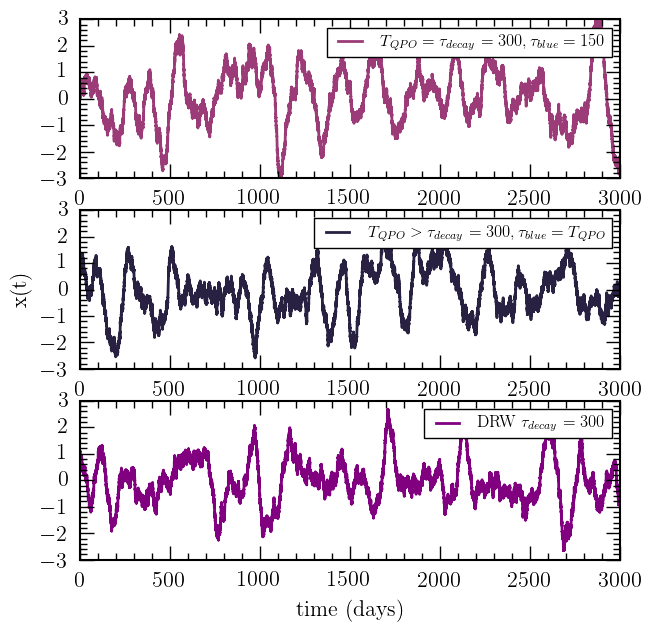

In [994]:
#show degeneracy    
cmap = plt.get_cmap('inferno')

c1 = cmap.colors[0]
c2 = cmap.colors[1]

rnp = len(cmap.colors)

part_colors = np.zeros((rnp, 4))

part_colors[:,3] = 0.9 # set the alpha = 0.5

part_colors[:,:3] = cmap.colors # set the particle colors to inferno
ax1 = plt.subplot(3,1,1)     
#newlc = simLC(decay = 300., qpo = 300., rise = None, blue = 150., p  = 2, q = 1)  
ax1.plot(newlc.t, newlc.x,color =part_colors[2*50,:], label = r"$T_{QPO} = \tau_{decay} = 300, \tau_{blue} = 150$")
ax1.set_ylim(-3,3)
plt.legend()
ax2 = plt.subplot(3,1,2) 
#newlc2 = simLC(decay = 300., qpo = 800, rise = None, blue = 800., p  = 2, q = 1) 
ax2.plot(newlc2.t, newlc2.x, color =part_colors[20,:], label = r"$T_{QPO} > \tau_{decay} = 300, \tau_{blue} = T_{QPO}$")
ax2.set_ylabel("x(t)")
ax2.set_ylim(-3,3)
plt.legend()
ax3 = plt.subplot(3,1,3) 
newlc3 = simLC(decay = 300., p  = 1, q = 0) 
ax3.plot(newlc3.t, newlc3.x, color = "purple", label = r"DRW $\tau_{decay} = 300$")
ax3.set_xlabel("time (days)")
ax3.set_ylim(-3,3)
plt.legend()
plt.savefig('SF_lcs.png', dpi = 200)

In [145]:
def riseDHO(decay = 100., rise = 25.,blue = 5.0 ,color = 1, alpha = 1.0,label = None, amp = 0.36025, ax = ax,plotGreen =False, plotRed = False):
    
    cmap = plt.get_cmap('inferno')

    c1 = cmap.colors[0]
    c2 = cmap.colors[1]

    rnp = len(cmap.colors)

    part_colors = np.zeros((rnp, 4))

    part_colors[:,3] = 0.5 # set the alpha = 0.5

    part_colors[:,:3] = cmap.colors # set the particle colors to inferno
    b1 = amp
    
    Rho = np.array([(-1.0/decay), (-1.0/rise), -1.0/blue, 1.0])
    Theta = kali.carma.coeffs(2, 1, Rho)
    nt2 = kali.carma.CARMATask(2, 1)
    nt2.set(0.02,Theta)
    lagsM_dho_damped, sfM_dho_damped = nt2.sf(num=10000,start=0., stop=10000.0)
    #Sf
    ax.plot(lagsM_dho_damped, sfM_dho_damped, color = part_colors[color,:], linewidth  = 3,alpha = alpha, label = label)
    
    #blue dashed lines
    value = np.where(np.isclose(lagsM_dho_damped,blue/(np.sqrt(2)*np.pi), atol=1e-10 ) == True)[0]
    if len(value)==0:
        value = np.where(np.isclose(lagsM_dho_damped,blue/(np.sqrt(2)*np.pi), atol=9e-1 ) == True)[0]
        avgP = np.nanmean(sfM_dho_damped[value[:]])
    else: 
        print(len(value))
        avgP = np.nanmean(sfM_dho_damped[value[:]])
    ax.plot([blue/(np.sqrt(2)*np.pi),blue/(np.sqrt(2)*np.pi)], [sfM_dho_damped.min(),avgP], c = "cyan", lw = 3,linestyle = '--', zorder = 0)
    
    
    if plotRed == True:
        redvalue = np.where(np.isclose(lagsM_dho_damped,decay, atol=1e-6) == True)[0]
        if len(redvalue)==0:
            redvalue = np.where(np.isclose(lagsM_dho_damped,decay, atol=9e-1 ) == True)[0]
            redavgP = np.nanmean(sfM_dho_damped[redvalue[:]])
        else: 
            redavgP = np.nanmean(sfM_dho_damped[redvalue[:]])
            print(len(value),redavgP)
        #RED DASHED LINE FOR DECAY TIMESCALE
        ax.plot([decay.real,decay.real], [sfM_dho_damped.min(),redavgP], c = "red",lw = 3, linestyle = '--', zorder = 0)
        #ax.plot(lagsM_dho_damped, acfM_dho_damped, color = part_colors[color,:], linewidth  = 3,alpha = alpha, label = label)
    if plotGreen == True:
        redvalue = np.where(np.isclose(lagsM_dho_damped,rise, atol=1e-6) == True)[0]
        if len(redvalue)==0:
            redvalue = np.where(np.isclose(lagsM_dho_damped,rise, atol=9e-1 ) == True)[0]
            redavgP = np.nanmean(sfM_dho_damped[redvalue[:]])
        else: 
            redavgP = np.nanmean(sfM_dho_damped[redvalue[:]])
            print(len(value),redavgP)
        #RED DASHED LINE FOR DECAY TIMESCALE
        ax.plot([rise,rise], [sfM_dho_damped.min(),redavgP], c = "darkred",lw = 2, linestyle = '--', zorder = 0)
        #ax.plot(lagsM_dho_damped, acfM_dho_damped, color = part_colors[color,:], linewidth  = 3,alpha = alpha, label = label)


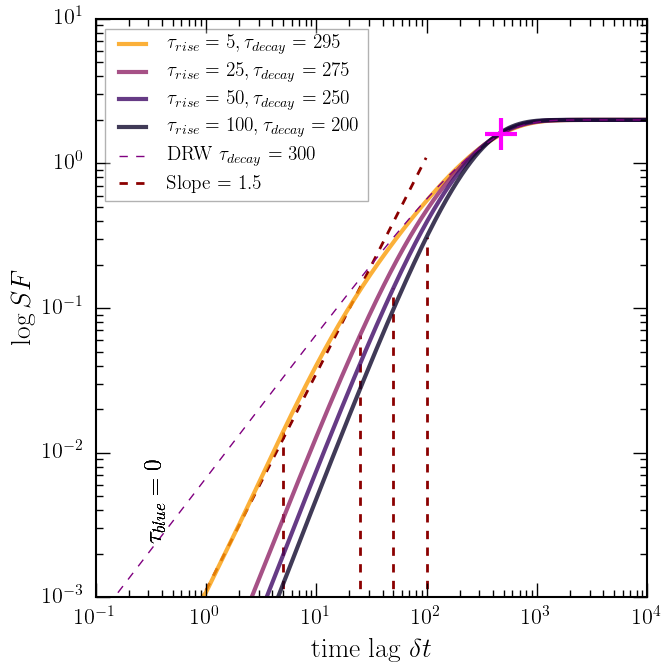

In [169]:
decay = np.array([295.,275.,250., 200.])
rise = np.array([5.,25.,50.,100.])

blue = np.array([ 3.,3., 3., 3.])*np.sqrt(2)*np.pi *0.1
#blue = np.array([ 1., 5., 30.,  1000.])*1.6*np.pi
blueT = np.array(blue)/(np.sqrt(2)*np.pi)
ax2 = plt.subplot(1,1,1) 
riseDHO(rise = rise[0],decay = decay[0], blue = blue[0],color =4*50,  alpha = 0.8, plotGreen = True, label = r"$\tau_{rise} = %0.f, \tau_{decay} = %0.f$"%(rise[0],decay[0]), ax = ax2)
riseDHO(rise = rise[1],decay = decay[1],blue = blue[1],color =2*50,  alpha = 0.8, plotGreen = True, label = r"$\tau_{rise} = %0.f, \tau_{decay} = %0.f$"%(rise[1],decay[1]),ax = ax2)
riseDHO(rise = rise[2],decay = decay[2],blue = blue[2], color =1*50,  alpha = 0.8,  plotGreen = True,label = r"$\tau_{rise} = %0.f, \tau_{decay} = %0.f$"%(rise[2],decay[2]),ax = ax2)
riseDHO(rise = rise[3],decay = decay[3],blue = blue[3], color =20, alpha = 0.8, plotGreen = True, label = r"$\tau_{rise} = %0.f, \tau_{decay} = %0.f$"%(rise[3],decay[-1]),ax = ax2)
#plt.text(decay+5, 3e-1, r"$\tau_{decay} = %0.f$"%(decay), fontsize = 18)
for B in blueT:
    plt.text(B, 7e-3, r"$\tau_{blue} = %0.f$"%(B), fontsize = 18,  rotation= 90, zorder = 12)
Rhodrw = np.array([(-1.0/300.), 1.0])
Thetadrw = kali.carma.coeffs(1, 0, Rhodrw)
ntdrw = kali.carma.CARMATask(1, 0)
ntdrw.set(0.02,Thetadrw)
lagsM_drw, sfM_drw = ntdrw.sf(num=10000,start=0., stop=10000.0)
ax2.plot(lagsM_drw, sfM_drw, color = 'purple', linewidth  = 1 ,linestyle = '--', label = r'DRW $\tau_{decay} = 300$')
ax2.scatter(lagsM_drw[np.where(sfM_drw < sfM_drw.max()*0.795)[0][-1]], sfM_drw.max()*0.795, color = 'magenta',lw = 3, marker = "+", s = 500, zorder = 10)
plt.plot(np.arange(1,1e2),np.arange(1,1e2)**1.5/900, linestyle = "--",color = "darkred", linewidth = 2, zorder = 0, label = "Slope = 1.5" )
#plt.text(3e3,3, "I", fontsize = 30)



ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_xlim(1e-1,1e4)
ax2.set_ylim(1e-3,10)
ax2.set_xlabel(r'time lag $\delta t$', fontsize = 20)
ax2.set_ylabel(r'$\log SF$',fontsize = 20)
plt.legend(loc = "upper left",handlelength = 2, fontsize = 14, framealpha=0.3)
plt.tight_layout()
plt.savefig("./SFgrid3new.pdf", dpi = 200)

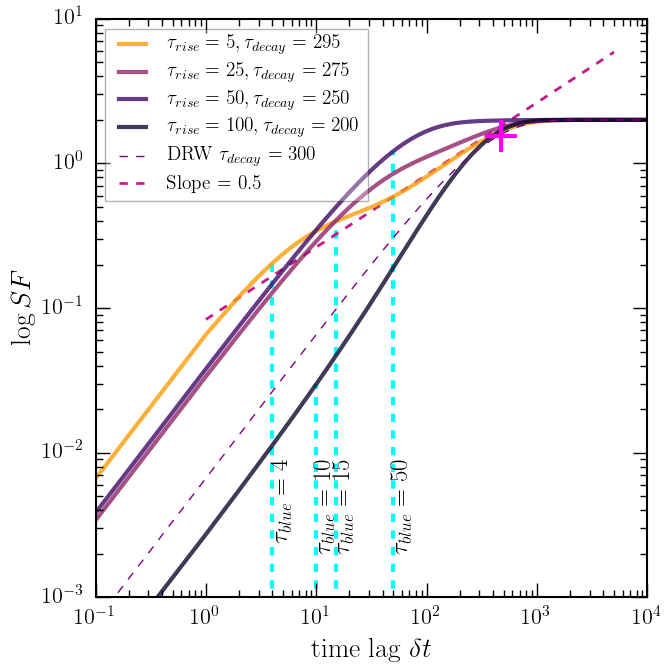

In [171]:
plt.rcParams["figure.figsize"] = (7,7)

decay = np.array([295.,275.,250., 200.])
rise = np.array([5.,25.,50.,100.])

blue = np.array([ 4.,15., 50.,10.])*np.sqrt(2)*np.pi 
#blue = np.array([ 1., 5., 30.,  1000.])*1.6*np.pi
blueT = np.array(blue)/(np.sqrt(2)*np.pi)
ax2 = plt.subplot(1,1,1) 
riseDHO(rise = rise[0],decay = decay[0], blue = blue[0],color =4*50,  alpha = 0.8, label = r"$\tau_{rise} = %0.f, \tau_{decay} = %0.f$"%(rise[0],decay[0]), ax = ax2)
riseDHO(rise = rise[1],decay = decay[1],blue = blue[1],color =2*50,  alpha = 0.8, label = r"$\tau_{rise} = %0.f, \tau_{decay} = %0.f$"%(rise[1],decay[1]),ax = ax2)
riseDHO(rise = rise[2],decay = decay[2],blue = blue[2], color =1*50,  alpha = 0.8, label = r"$\tau_{rise} = %0.f, \tau_{decay} = %0.f$"%(rise[2],decay[2]),ax = ax2)
riseDHO(rise = rise[3],decay = decay[3],blue = blue[3], color =20, alpha = 0.8, label = r"$\tau_{rise} = %0.f, \tau_{decay} = %0.f$"%(rise[3],decay[-1]),ax = ax2)
#plt.text(decay+5, 3e-1, r"$\tau_{decay} = %0.f$"%(decay), fontsize = 18)
for B in blueT:
    plt.text(B+.1, 7e-3, r"$\tau_{blue} = %0.f$"%(B), fontsize = 18,  rotation= 90, zorder = 12)
Rhodrw = np.array([(-1.0/300.), 1.0])
Thetadrw = kali.carma.coeffs(1, 0, Rhodrw)
ntdrw = kali.carma.CARMATask(1, 0)
ntdrw.set(0.02,Thetadrw)
lagsM_drw, sfM_drw = ntdrw.sf(num=10000,start=0., stop=10000.0)
ax2.plot(lagsM_drw, sfM_drw, color = 'purple', linewidth  = 1 ,linestyle = '--', label = r'DRW $\tau_{decay} = 300$')
ax2.scatter(lagsM_drw[np.where(sfM_drw < sfM_drw.max()*0.795)[0][-1]], sfM_drw.max()*0.78, color = 'magenta',lw = 3, marker = "+", s = 500, zorder = 10)
Rhodrw = np.array([(-1.0/50.), 1.0])
Thetadrw = kali.carma.coeffs(1, 0, Rhodrw)
ntdrw = kali.carma.CARMATask(1, 0)
ntdrw.set(0.02,Thetadrw)
lagsM_drw, sfM_drw = ntdrw.sf(num=10000,start=0.2, stop=10000.0)
#ax2.plot(lagsM_drw, sfM_drw, color = 'lightgrey', linewidth  = 1 ,linestyle = '--',zorder = 11, label = r'DRW $\tau_{decay} = 50$')
plt.plot(np.arange(1,5e3),np.arange(1,5e3)**0.5/12, linestyle = "--",color = "#c51b8a", linewidth = 2, zorder = 0, label = "Slope = 0.5" )
#plt.text(3e3,3, "IV", fontsize = 30)


ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_xlim(1e-1,1e4)
ax2.set_ylim(1e-3,10)
ax2.set_xlabel(r'time lag $\delta t$', fontsize = 20)
ax2.set_ylabel(r'$\log SF$',fontsize = 20)
plt.legend(loc = "upper left",handlelength = 2, fontsize = 14, framealpha=0.3)
plt.tight_layout()
plt.savefig("./SFgrid4new.pdf", dpi = 200)

# To Summarize.... Let's look at the full Analysis Toolkit

In [4]:
def tripleThreatDHO(decay = 300., rise = 50., blue  = 5., length = 3000., complexDHO = False):

    #DRW lc
    if complexDHO == True:
        Rhodho = np.array([complex((-1.0/decay )+ (1./rise*1.j)),complex((-1.0/decay )- (1./rise*1.j)), (-1/blue), .3])
    else:
        Rhodho = np.array([(-1.0/decay),(-1.0/rise), (-1/blue), .3])
    Thetadho = kali.carma.coeffs(2, 1, Rhodho)
    dho = kali.carma.CARMATask(2, 1)
    dho.set(0.02,Thetadho)
    #acf
    dholc = dho.simulate(duration=length)#,burnSeed=1, distSeed=1)
    greens = (np.exp((-1.0/decay)*dholc.t)-np.exp((-1.0/rise)*dholc.t))/((-1.0/decay)-(-1.0/rise))
    lags, acf = dho.acf(num=2000, start=0, stop = length)
    #sf
    lags, sf = dho.sf(num=2000, start=0, stop = length)
    #PSD
    freq0 = np.linspace(-np.log10(length), np.log10(length),length)
    freq = np.power(10., freq0)
    b0,b1 = Thetadho[-2],Thetadho[-1]
    bluePSD = 1./(2.*np.pi)*(b0**2.+4.*np.pi**2.*b1**2.*freq**2.)
    a1, a2 = Thetadho[0], Thetadho[1]
    Denom = (16.*np.pi**4 * freq**4) + ((4.*np.pi**2 * freq**2) * (a1**2 - (2.*a2)))+ a2**2
    psd = bluePSD/Denom
    


    return dholc.t, dholc.x, greens, lags, acf, sf, freq, psd, 

#timelc, fluxlc, greens, lags, ACF, SF, freq, PSD = tripleThreatDHO(decay = 300.,rise = 25., blue = 10., length = 3000.)

In [5]:
timelcqpo, fluxlcqpo, greensqpo, lagsqpo, ACFqpo, SFqpo, freqqpo, PSDqpo = tripleThreatDHO(decay = 320.,rise = 180., blue = 150., length = 3000., complexDHO = True)

/Users/Jackster/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


In [6]:
timelc, fluxlc, greens, lags, ACF, SF, freq, PSD = tripleThreatDHO(decay = 210.,rise = 15., blue = 5., length = 3000.)

/Users/Jackster/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


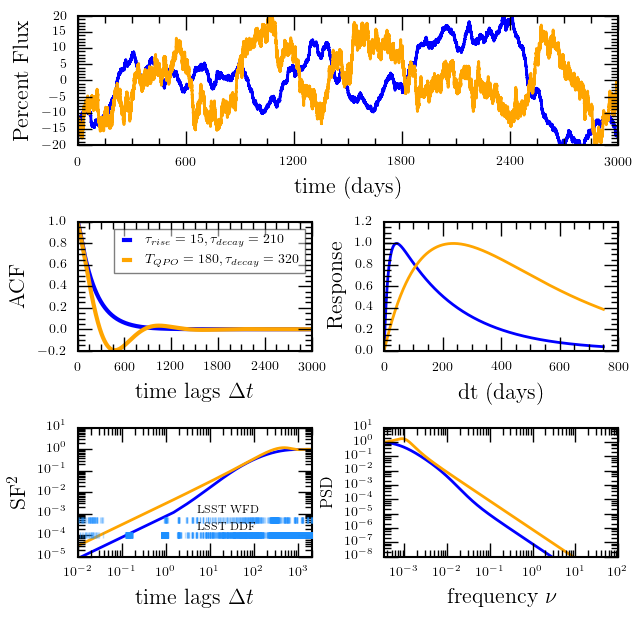

In [53]:
purples = ['orange','#006d2c','#41b6c4','#fd8d3c']

grid = plt.GridSpec(3, 4, wspace=0.9, hspace=0.6)

#lc
ax = plt.subplot(grid[0,:])
F1 = (fluxlc-fluxlc.mean())/fluxlc.mean()
F2 =(fluxlcqpo-fluxlcqpo.mean())/fluxlcqpo.mean()
ax.plot(timelc, F1/F1.max()*20, color = "blue")
ax.plot(timelcqpo,  F2/F2.max()*20, color = "orange")

ax.set_xlabel(r"time (days)")
ax.set_ylabel('Percent Flux')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
#ax.xaxis.set_ticklabels(["0", "","", "","", "3000"])
ax.xaxis.set_tick_params(labelsize = 10)
ax.yaxis.set_tick_params(labelsize = 10)
ax.set_ylim(-20,20)



#acf
ax4 = plt.subplot(grid[1, :2])
ax4.plot(lags, ACF  , linewidth = 3,label = r"$\tau_{rise} = 15, \tau_{decay} = 210$", color = "blue")
ax4.plot(lagsqpo, ACFqpo  , linewidth = 3,label = r"$T_{QPO} = 180,\tau_{decay} = 320$", color = purples[0])
ax4.legend(fontsize = 10, handlelength = 1, framealpha = 0.5)
ax4.set_xlabel(r"time lags $\Delta t$")
ax4.set_ylabel('ACF')
ax4.xaxis.set_major_locator(plt.MaxNLocator(5))
#ax4.xaxis.set_ticklabels(["0", "","", "","", "3000"])
ax4.yaxis.set_tick_params(labelsize = 10)
ax4.xaxis.set_tick_params(labelsize = 10)

#Greens
ax5 = plt.subplot(grid[1, 2:])
ax5.plot(timelc[:len(timelc)/4],greens[:len(timelc)/4]/greens.max(), color = "blue")
ax5.plot(timelc[:len(timelc)/4],greensqpo[:len(timelc)/4]/greensqpo.max(), color = purples[0])

ax5.xaxis.set_major_locator(plt.MaxNLocator(5))
ax5.yaxis.set_tick_params(labelsize = 10)
ax5.xaxis.set_tick_params(labelsize = 10)
ax5.set_ylim(0,1.2)
ax5.set_xlabel(r"dt (days)")
ax5.set_ylabel('Response')

#SF
ax2 = plt.subplot(grid[2, :2])
ax2.plot(lags,SF/SF.max()  , linewidth = 2,color = "blue")
ax2.plot(lagsqpo,SFqpo/SFqpo[-1]  , linewidth = 2, color = purples[0])
ax2.scatter( ddflags[sample],botddf[sample], color = "dodgerblue",marker = "|", alpha = 0.3, zorder = 3)
ax2.scatter( wfdlags[samplewfd],botwfd[samplewfd], color = "dodgerblue",marker = "|",alpha = 0.3, zorder = 3 )
ax2.text(5,botwfd[0]*2, "LSST WFD", fontsize = 8)
ax2.text(5,botddf[0]*1.5, "LSST DDF",fontsize = 8)

#ax2.plot([lags.min(),lags.max()] ,[1.,1.], color = "grey",linestyle = "--",lw = 2, label = r"$\propto \Delta t^{0}$"  )
#ax2.plot(lags,lags**1./2.3e2, color = "crimson",linestyle = "--", label = r"$\propto \Delta t^{1.0}$"  )
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_ylim(1e-5,1e1)
ax2.set_xlim(1e-2,2e3)
ax2.set_xlabel(r"time lags $\Delta t$")
ax2.set_ylabel('SF$^{2}$')
ax2.xaxis.set_tick_params(labelsize = 10)
ax2.yaxis.set_tick_params(labelsize = 10)
#plt.legend(loc = "upper left", handlelength = 2,fontsize = 12,framealpha = 0.6, )


#PSD
ax3 = plt.subplot(grid[2, 2:])
ax3.plot(freq,PSD/PSD.max() , linewidth = 2, color = "blue")
ax3.plot(freqqpo,PSDqpo/PSDqpo[0] , linewidth = 2, color = purples[0])

#ax3.plot([freq.min(),freq.max()] ,[1.,1.], color = "grey",linestyle = "--",lw = 2, label = r"$\propto \nu^{0}$"  )
#ax3.plot(freq,freq**-2./4e4, color = "crimson",linestyle = "--", label = r"$\propto \nu^{-2}$"  )
ax3.set_xscale("log")
ax3.set_yscale("log")
ax3.xaxis.set_tick_params(labelsize = 10)
ax3.yaxis.set_tick_params(labelsize = 10)

ax3.set_ylim(1e-8,1e1)
ax3.set_xlim(freq.min(),1./1e-2)
plt.legend(loc = "lower left", handlelength = 2,fontsize = 12,framealpha = 0.6)
ax3.set_xlabel(r"frequency $\nu$")
ax3.set_ylabel('PSD', fontsize = 12)


plt.savefig('lasgrid.pdf', dpi = 200)

# Run these cells first or plot above will not compile or import your own cadence files

In [8]:
ddf = np.loadtxt('ddfCadenceLC_dho_real.txt')
wfd = np.loadtxt('wfdCadenceLC_dho_real.txt')

In [26]:
wfdlags = np.loadtxt("lsst-wfd-lags.txt")
ddflags = np.loadtxt("lsst-ddf-lags.txt")

ddflags = np.sort(ddflags)

In [49]:
ddflags = np.sort(np.unique(ddflags))
sample = np.where(np.log10(ddflags[1:])-np.log10(ddflags[0:-1])>0.0001)[0]

In [43]:
len(sample)

501

In [27]:
botwfd  = np.zeros(len(wfdlags))
botwfd[:] = 5e-4
botddf  = np.zeros(len(ddflags))
botddf[:] = 1e-4

In [46]:
wfdlags = np.sort(np.unique(wfdlags))
samplewfd = np.where(np.log10(wfdlags[1:])-np.log10(wfdlags[0:-1])>0.001)[0]
len(samplewfd)

518